In [109]:
# import necessary libraries 
from dotenv import load_dotenv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## **PostPartum Depression**

**Mental Disorders in Pregnant Women**  

This study utilizes a dataset sourced from [Kaggle](https://www.kaggle.com/datasets/parvezalmuqtadir2348/postpartum-depression/data), containing **1,503 records** collected from a medical hospital via a Google Forms questionnaire. The data was gathered between **June 14th and 15th, 2022**, and includes **15 attributes**, of which **10 were selected** for analysis. Among these, **9 attributes** were used as predictors, while the **target variable, "Feeling Anxious,"** serves as a key indicator of postpartum depression risk. The dataset provides valuable insights into mental health trends among pregnant and postpartum women, helping identify early signs of depression.  

In [189]:
# load the datasets
post_natal = pd.read_csv("Data\post natal data.csv")
post_natal.head()


,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [190]:
# check the data types of the columns
post_natal.dtypes

Timestamp                                    object
Age                                          object
Feeling sad or Tearful                       object
Irritable towards baby & partner             object
Trouble sleeping at night                    object
Problems concentrating or making decision    object
Overeating or loss of appetite               object
Feeling anxious                              object
Feeling of guilt                             object
Problems of bonding with baby                object
Suicide attempt                              object
dtype: object

In [191]:
# check for missing values
post_natal.isnull().sum()

Timestamp                                     0
Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling anxious                               0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
dtype: int64

In [192]:
# fill missing values with the mode of the column
post_natal["Irritable towards baby & partner"].fillna(post_natal["Irritable towards baby & partner"].mode()[0], inplace=True)
post_natal["Problems concentrating or making decision"].fillna(post_natal["Problems concentrating or making decision"].mode()[0], inplace=True)
post_natal["Feeling of guilt"].fillna(post_natal["Feeling of guilt"].mode()[0], inplace=True)

In [193]:
# changing the datatype of the Timestamp column to datetime64
post_natal["Timestamp"] = pd.to_datetime(post_natal["Timestamp"])

In [194]:
post_natal["Age"].head()

0    35-40
1    40-45
2    35-40
3    35-40
4    40-45
Name: Age, dtype: object

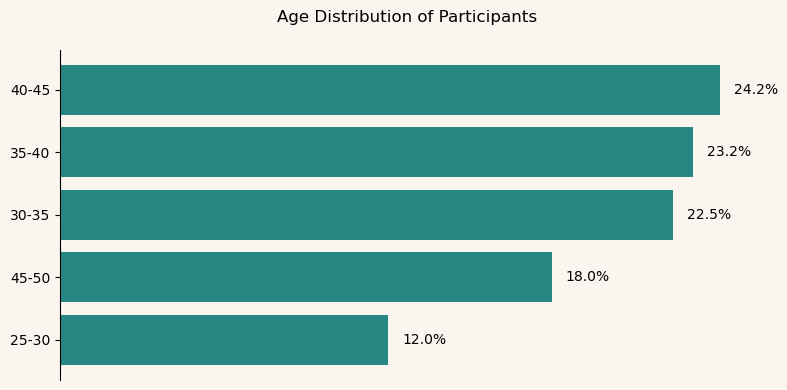

In [176]:
# Calculate value counts and percentages
age_counts = post_natal['Age'].value_counts()
age_percent = (age_counts / age_counts.sum()) * 100

# Sort the percentages in descending order
age_percent = age_percent.sort_values(ascending=True)

# Create horizontal bar plot
fig, ax = plt.subplots(figsize=(8, 4))

# Set the background colour of the plot
fig.patch.set_facecolor('#FAF5EE')  # Set background color
ax.set_facecolor('#FAF5EE')         # Set plot area background color

# Plot with specified color
bars = ax.barh(age_percent.index, age_percent, color='#278783')

# Add percentage labels with specified color
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.5,                        # x position (slightly right of bar)
            bar.get_y() + bar.get_height() / 2, # y position (middle of bar)
            f'{width:.1f}%',                    # text (percentage with 1 decimal)
            va='center', ha='left', fontsize=10)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove x-axis
ax.set_xticks([])

# Add title
ax.set_title('Age Distribution of Participants', pad=20)

plt.tight_layout()
plt.show()

### **RQ1: What sociodemographic and clinical characteristics are significantly associated with postpartum depression symptoms?**

In [177]:
# Convert 'Feeling anxious' to binary: Yes = 1, others = 0
post_natal['Anxiety_binary'] = post_natal['Feeling anxious'].apply(lambda x: 1 if x == 'Yes' else 0)

# List of categorical predictors
predictors = ['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner',
              'Trouble sleeping at night', 'Problems concentrating or making decision',
              'Overeating or loss of appetite', 'Feeling of guilt',
              'Problems of bonding with baby', 'Suicide attempt']

# Loop through predictors and run chi-square test
for col in predictors:
    contingency = pd.crosstab(post_natal[col], post_natal['Anxiety_binary'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f'\nChi-square Test for {col}')
    print('--------------------------------')
    print('Chi2 Statistic:', round(chi2, 3))
    print('Degrees of Freedom:', dof)
    print('P-value:', round(p, 4))
    if p < 0.05:
        print(f'Conclusion: Significant association between {col} and Anxiety')
    else:
        print(f'Conclusion: No significant association between {col} and Anxiety')



Chi-square Test for Age
--------------------------------
Chi2 Statistic: 11.764
Degrees of Freedom: 4
P-value: 0.0192
Conclusion: Significant association between Age and Anxiety

Chi-square Test for Feeling sad or Tearful
--------------------------------
Chi2 Statistic: 7.415
Degrees of Freedom: 2
P-value: 0.0245
Conclusion: Significant association between Feeling sad or Tearful and Anxiety

Chi-square Test for Irritable towards baby & partner
--------------------------------
Chi2 Statistic: 180.589
Degrees of Freedom: 2
P-value: 0.0
Conclusion: Significant association between Irritable towards baby & partner and Anxiety

Chi-square Test for Trouble sleeping at night
--------------------------------
Chi2 Statistic: 47.575
Degrees of Freedom: 2
P-value: 0.0
Conclusion: Significant association between Trouble sleeping at night and Anxiety

Chi-square Test for Problems concentrating or making decision
--------------------------------
Chi2 Statistic: 137.756
Degrees of Freedom: 2
P-value:

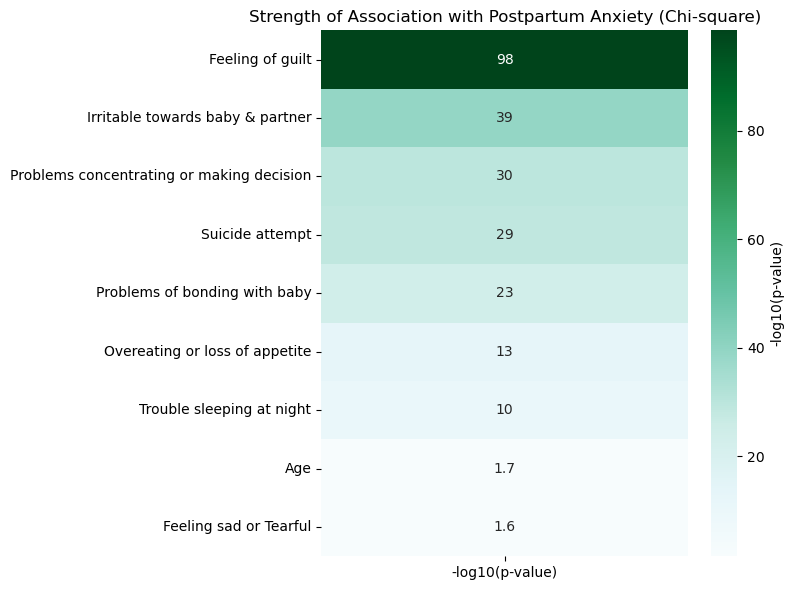

In [119]:
# Convert 'Feeling anxious' to binary: Yes = 1, others = 0
post_natal['Anxiety_binary'] = post_natal['Feeling anxious'].apply(lambda x: 1 if x == 'Yes' else 0)

# List of categorical predictors
predictors = ['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner',
              'Trouble sleeping at night', 'Problems concentrating or making decision',
              'Overeating or loss of appetite', 'Feeling of guilt',
              'Problems of bonding with baby', 'Suicide attempt']

# Store p-values
chi2_p_values = {}

for col in predictors:
    contingency = pd.crosstab(post_natal[col], post_natal['Anxiety_binary'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi2_p_values[col] = p

# Convert to DataFrame
pval_df = pd.DataFrame.from_dict(chi2_p_values, orient='index', columns=['p-value'])

# Apply -log10 transformation for better visualization
pval_df['-log10(p-value)'] = -np.log10(pval_df['p-value'])

# Sort by -log10(p-value) in descending order
pval_df_sorted = pval_df.sort_values('-log10(p-value)', ascending=False)

# Create sorted heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pval_df_sorted[['-log10(p-value)']], annot=True, cmap='BuGn', cbar_kws={'label': '-log10(p-value)'})

plt.title('Strength of Association with Postpartum Anxiety (Chi-square)')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [178]:
pval_df_sorted

,p-value,-log10(p-value)
Feeling of guilt,3.191079e-99,98.496062
Irritable towards baby & partner,6.105027e-40,39.214312
Problems concentrating or making decision,1.221043e-30,29.913269
Suicide attempt,1.659750e-29,28.779957
Problems of bonding with baby,5.899410e-24,23.229191
Overeating or loss of appetite,9.592463e-14,13.018070
Trouble sleeping at night,4.669754e-11,10.330706
Age,1.919442e-02,1.716825
Feeling sad or Tearful,2.454008e-02,1.610124


### **RQ2: Is there a pattern in symptom co-occurrence among mothers reporting anxiety?**

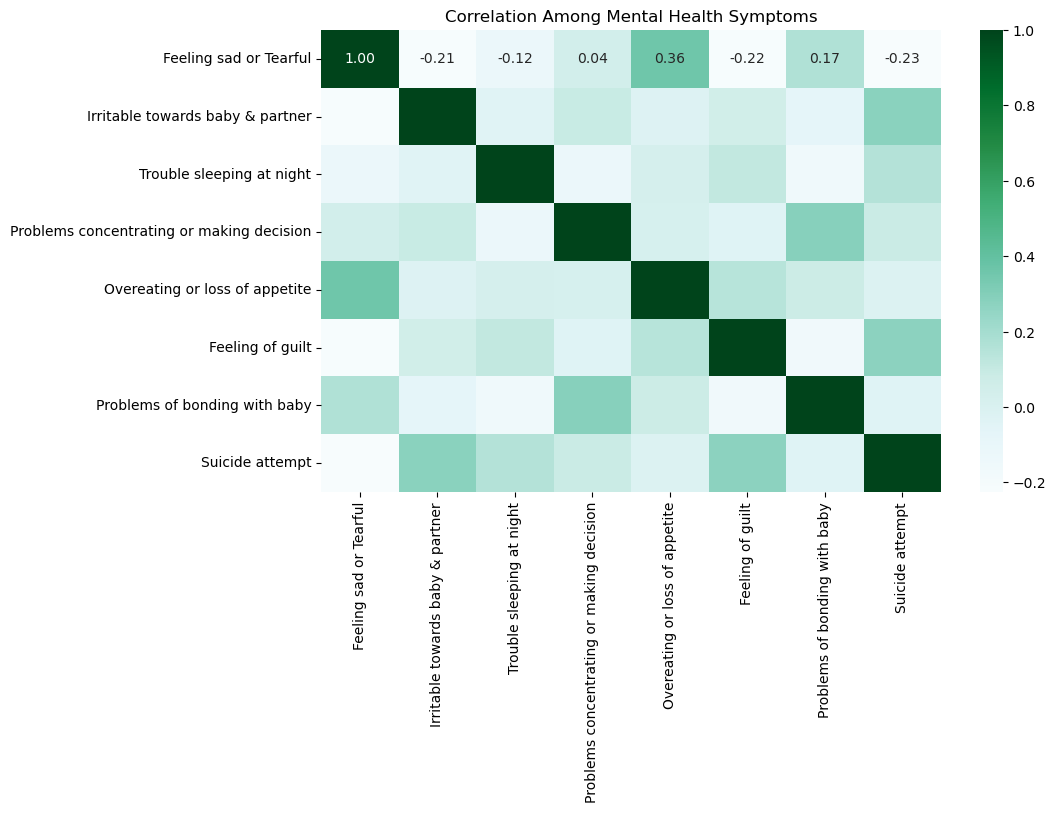

In [179]:
# Correlation matrix
symptoms = ['Feeling sad or Tearful', 'Irritable towards baby & partner',
            'Trouble sleeping at night', 'Problems concentrating or making decision',
            'Overeating or loss of appetite', 'Feeling of guilt', 
            'Problems of bonding with baby', 'Suicide attempt']

encoded = post_natal[symptoms].apply(LabelEncoder().fit_transform)
corr = encoded.corr()

# Plot heatmap
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='BuGn', fmt='.2f')
plt.title('Correlation Among Mental Health Symptoms')
plt.show()


### **RQ3: Does the prevalence of postpartum anxiety vary across age groups?**

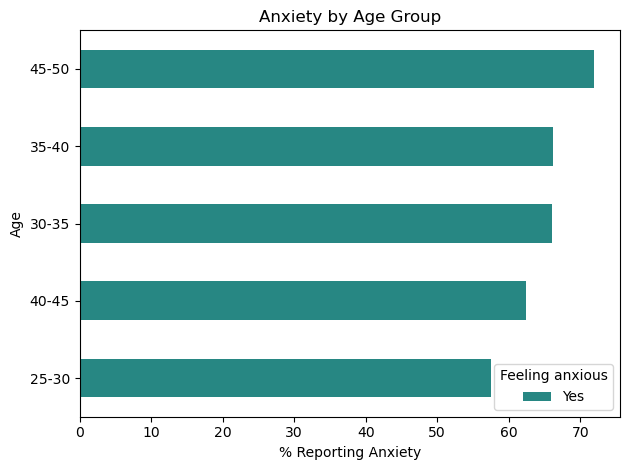

In [195]:
# Cross-tabulation
age_anxiety = pd.crosstab(post_natal['Age'], post_natal['Feeling anxious'], normalize='index') * 100
age_anxiety[['Yes']].sort_values('Yes').plot(kind='barh', color='#278783')
plt.xlabel('% Reporting Anxiety')
plt.title('Anxiety by Age Group')
plt.tight_layout()
plt.show()

In [181]:
age_anxiety["Yes"]

Age
25-30    57.458564
30-35    65.976331
35-40    66.189112
40-45    62.362637
45-50    71.955720
Name: Yes, dtype: float64

In [182]:
sorted_df

Feeling anxious,Yes
Age,
0,57.458564
3,62.362637
1,65.976331
2,66.189112
4,71.955720


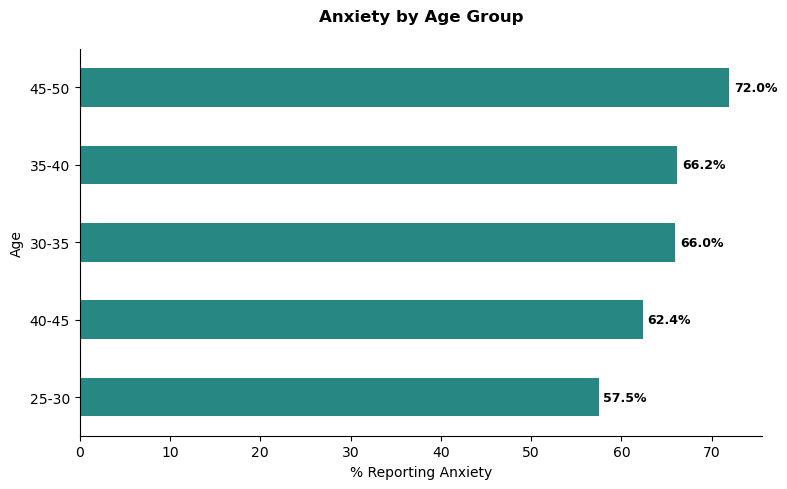

In [196]:
# Cross-tabulation
age_anxiety = pd.crosstab(post_natal['Age'], post_natal['Feeling anxious'], normalize='index') * 100

# Sort by percentage of "Yes"
age_anxiety = age_anxiety[['Yes']].sort_values('Yes')

# Plot
ax = age_anxiety.plot(
    kind='barh',
    color='#278783',
    legend=False,
    figsize=(8, 5)
)

# Add data labels
for i, value in enumerate(age_anxiety['Yes']):
    ax.text(value + 0.5, i, f'{value:.1f}%', va='center', fontsize=9, fontweight='bold')

# Custom y-axis labels
ax.set_yticks(range(len(age_anxiety)))
ax.set_yticklabels(age_anxiety.index, fontsize=10)
ax.set_ylabel('Age')

# Aesthetics
ax.set_xlabel('% Reporting Anxiety')
ax.set_title('Anxiety by Age Group', fontsize=12, fontweight='bold', pad=20)

# Remove upper and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### **RQ4: Is there a cumulative effect of multiple symptoms on postpartum anxiety?**

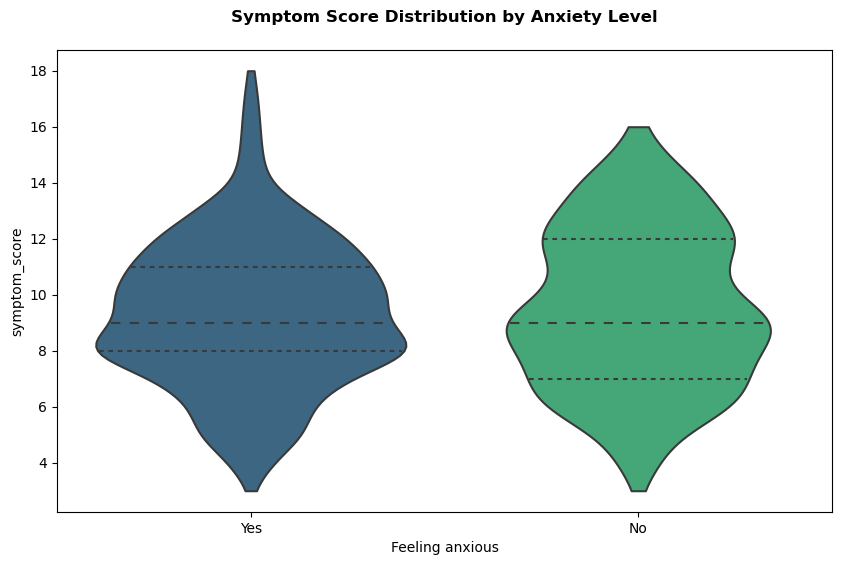

In [197]:
# Encode categorical variables
features = ['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner',
            'Trouble sleeping at night', 'Problems concentrating or making decision',
            'Overeating or loss of appetite', 'Feeling of guilt', 
            'Problems of bonding with baby', 'Suicide attempt']
for col in features:
    post_natal[col] = LabelEncoder().fit_transform(post_natal[col])


# Composite score
symptom_cols = features
post_natal['symptom_score'] = post_natal[symptom_cols].sum(axis=1)

# Plot
plt.figure(figsize=(10,6))
sns.violinplot(data=post_natal, x='Feeling anxious', y='symptom_score', 
               palette='viridis', inner='quartile', cut=0)
plt.title('Symptom Score Distribution by Anxiety Level', fontsize=12, fontweight='bold', pad=20)
plt.show()


### **Maternal Health Risk Dataset**   
This dataset captures critical health indicators for pregnant women, collected from hospitals and clinics via IoT-based monitoring systems. It includes:  

- **Key Features**:  
  • Maternal age  
  • Blood pressure (Systolic & Diastolic)  
  • Blood glucose levels (mmol/L)  
  • Resting heart rate  
- **Target Variable**:  
  • `Risk Level` (Low/Medium/High)  

**Purpose**: Predict pregnancy-related health risks to enable early intervention.  

**Dataset Link**: [Maternal Health Risk Data](https://www.kaggle.com/datasets/drmbsharma/maternal-health-risk-data-set)   

In [198]:
# load the Mental Health Risk Data
maternal_data = pd.read_csv("Data\Maternal Health Risk Data Set.csv")
maternal_data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [199]:
# check the data types of the columns
maternal_data.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [200]:
#check for missing values
maternal_data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

### **RQ4: Are physiological indicators (BP, BS, HR, Temp) associated with maternal risk level?**
**📌 Why?**
Clinical studies suggest that elevated BP, abnormal glucose, and high heart rate during pregnancy are physiological stressors that could influence mental well-being postpartum. Assessing their association with risk levels offers a foundation to correlate physiological instability and psychological vulnerability.

**🔍 Analysis:**
- Multivariate ANOVA (MANOVA): SystolicBP, DiastolicBP, BS, HeartRate, BodyTemp vs. RiskLevel.
- Post-hoc Tukey test to find which group differences are significant.
- Boxplots to visualize the spread of clinical variables across risk categories.

== MANOVA Results ==
                      Multivariate linear model
                                                                     
---------------------------------------------------------------------
       Intercept          Value   Num DF   Den DF    F Value   Pr > F
---------------------------------------------------------------------
          Wilks' lambda    0.0005 5.0000 1007.0000 388993.3781 0.0000
         Pillai's trace    0.9995 5.0000 1007.0000 388993.3781 0.0000
 Hotelling-Lawley trace 1931.4468 5.0000 1007.0000 388993.3781 0.0000
    Roy's greatest root 1931.4468 5.0000 1007.0000 388993.3781 0.0000
---------------------------------------------------------------------
                                                                     
----------------------------------------------------------------------
        RiskLevel         Value    Num DF    Den DF   F Value   Pr > F
----------------------------------------------------------------------
           Wilks' 

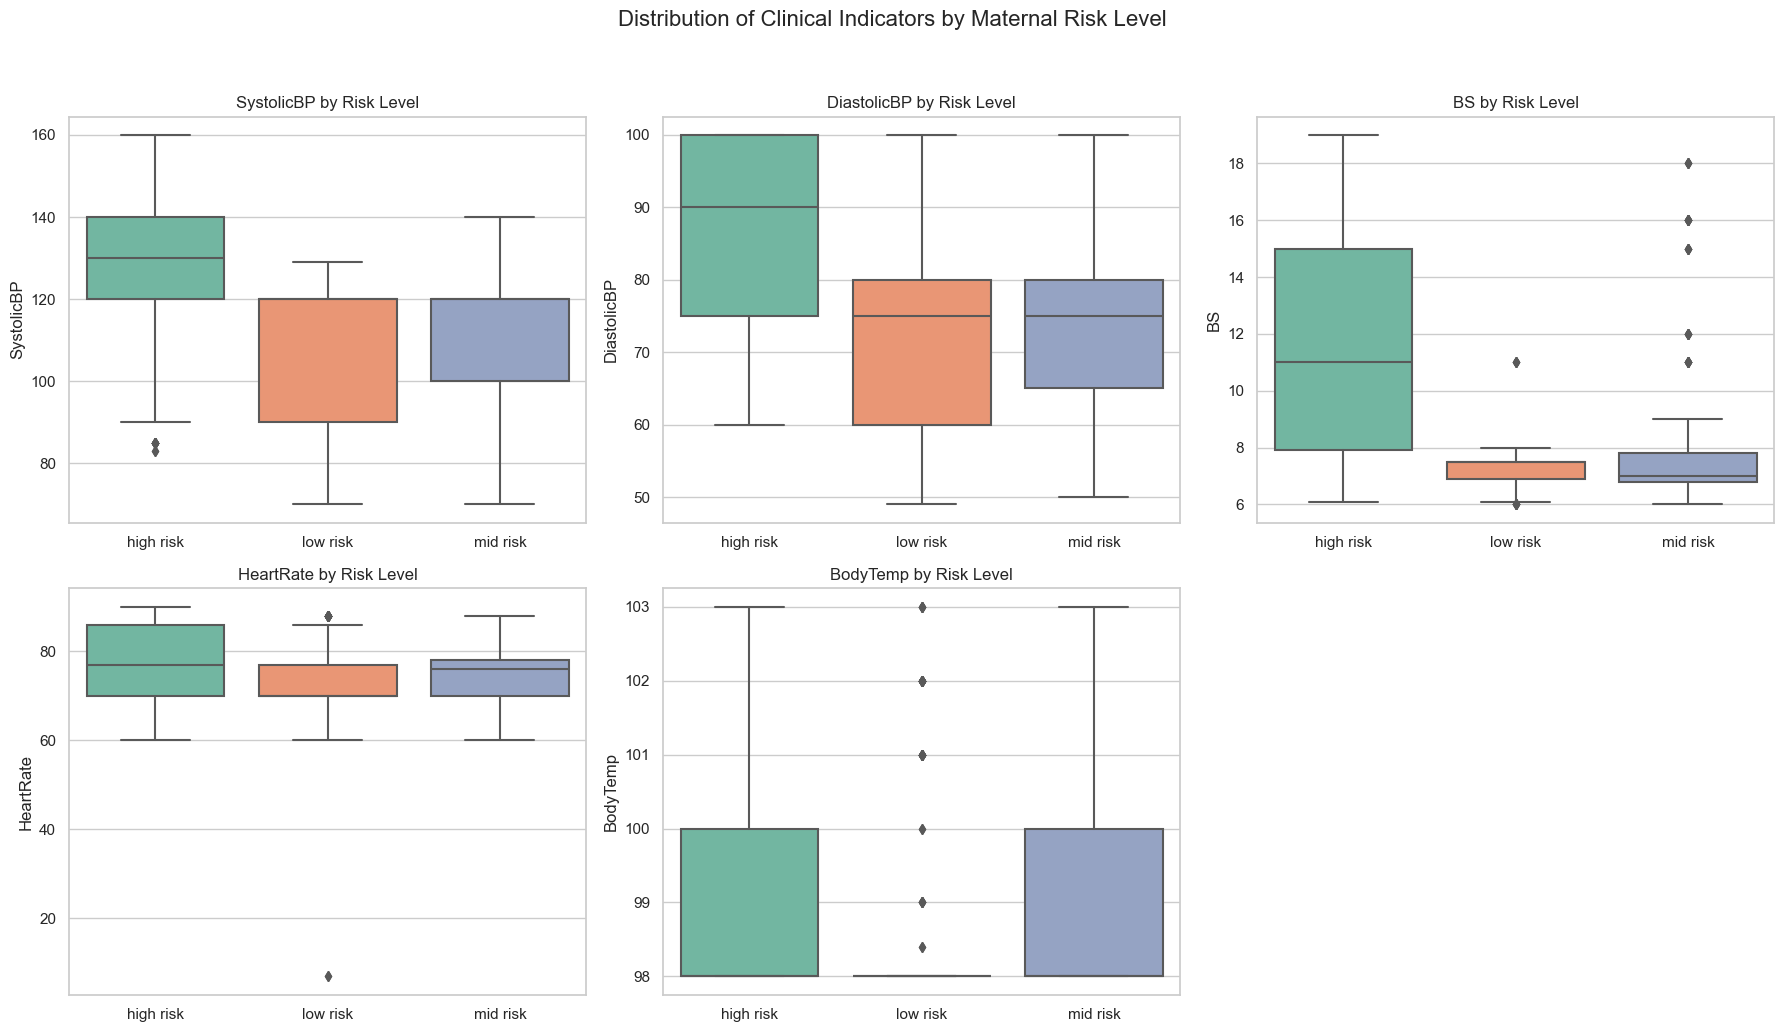

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
from statsmodels.formula.api import ols
import scikit_posthocs as sp

# Step 1: MANOVA
# -------------------------
manova = MANOVA.from_formula(
    'SystolicBP + DiastolicBP + BS + HeartRate + BodyTemp ~ RiskLevel',
    data=maternal_data
)
print("== MANOVA Results ==")
print(manova.mv_test())

# Step 2: Post-hoc Tukey HSD Tests
# -------------------------
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Loop through each clinical variable
for var in ['SystolicBP', 'DiastolicBP', 'BS', 'HeartRate', 'BodyTemp']:
    print(f"\n== Tukey HSD Test for {var} ==")
    tukey = pairwise_tukeyhsd(endog=maternal_data[var],
                              groups=maternal_data['RiskLevel'],
                              alpha=0.05)
    print(tukey)

# Step 3: Boxplots for Visualization
# -------------------------
sns.set(style="whitegrid")
clinical_vars = ['SystolicBP', 'DiastolicBP', 'BS', 'HeartRate', 'BodyTemp']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, var in enumerate(clinical_vars):
    sns.boxplot(data=maternal_data, x='RiskLevel', y=var, ax=axes[i], palette="Set2")
    axes[i].set_title(f'{var} by Risk Level')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(var)

# Hide empty plot if number of variables is odd
fig.delaxes(axes[-1])
plt.suptitle('Distribution of Clinical Indicators by Maternal Risk Level', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()


**Radar Charts**

In [206]:
agg

,RiskLevel,SystolicBP,DiastolicBP,BS,HeartRate,BodyTemp
0,high risk,124.194853,85.073529,12.122610,76.742647,98.899265
1,low risk,105.866995,72.534483,7.220271,72.770936,98.368966
2,mid risk,113.154762,74.232143,7.795744,74.175595,98.833333


Text(0.5, 1.1, 'Clinical Indicators by Risk Level')

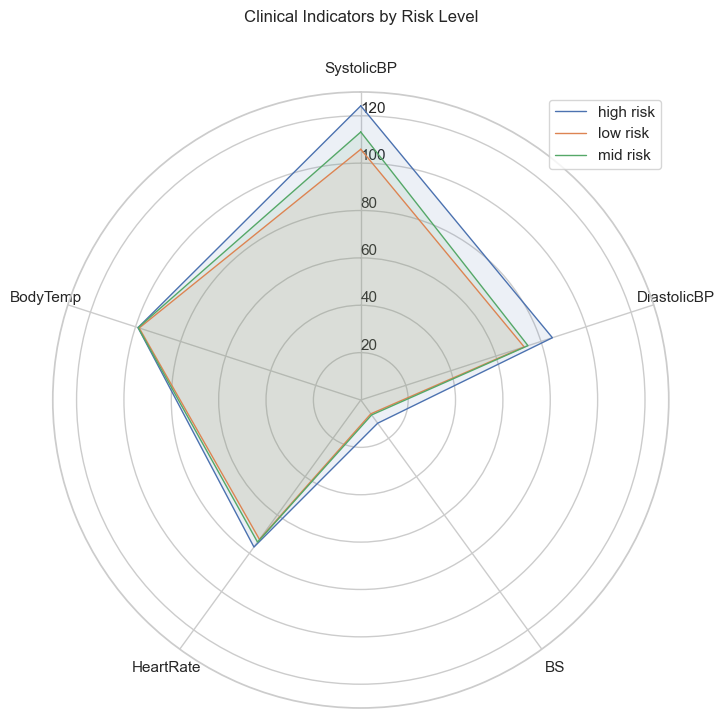

In [205]:
from math import pi

# Calculate group means
agg = maternal_data.groupby('RiskLevel')[clinical_vars].mean().reset_index()

# Plot
categories = clinical_vars
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

for risk in agg['RiskLevel']:
    values = agg[agg['RiskLevel'] == risk][categories].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, label=risk)
    ax.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
plt.legend(loc='upper right')
plt.title("Clinical Indicators by Risk Level", y=1.1)

**Heatmap of Group Means**

In [209]:
group_means

,SystolicBP,DiastolicBP,BS,HeartRate,BodyTemp
RiskLevel,,,,,
high risk,124.194853,85.073529,12.122610,76.742647,98.899265
low risk,105.866995,72.534483,7.220271,72.770936,98.368966
mid risk,113.154762,74.232143,7.795744,74.175595,98.833333


Text(0.5, 1.0, 'Standardized Mean Differences by Risk Level')

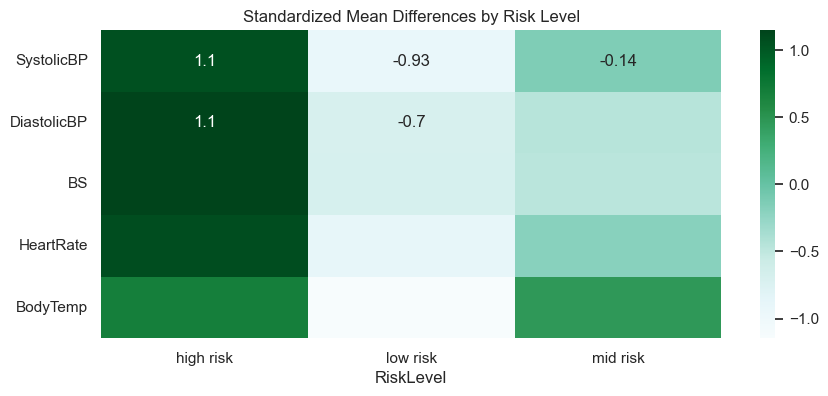

In [208]:
group_means = maternal_data.groupby('RiskLevel')[clinical_vars].mean()
std_means = (group_means - group_means.mean()) / group_means.std()

plt.figure(figsize=(10, 4))
sns.heatmap(std_means.T, annot=True, cmap="BuGn", center=0)
plt.title("Standardized Mean Differences by Risk Level")

**Dot Plot with Confidence Intervals**

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7696\878094430.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(


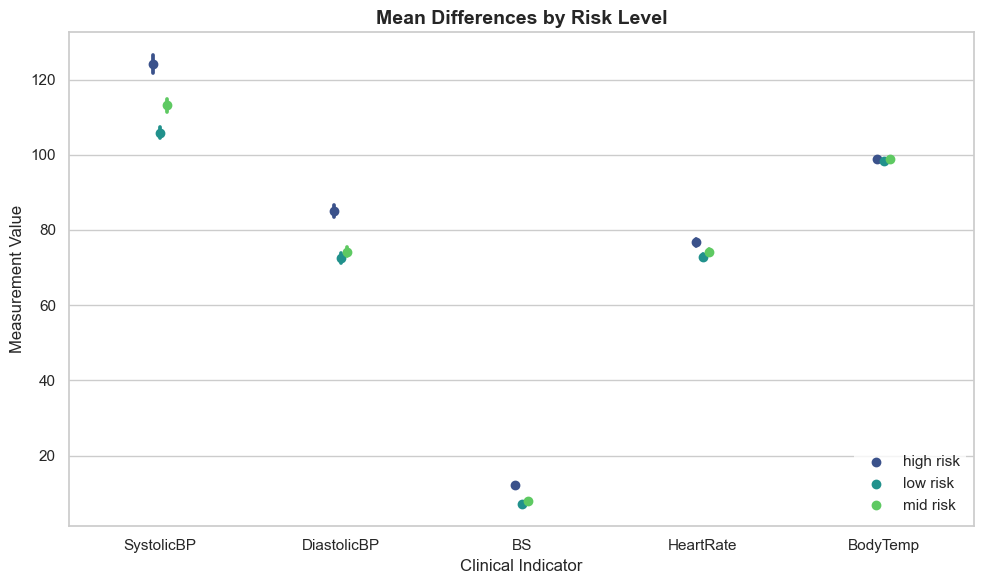

In [214]:
plt.figure(figsize=(10, 6))
ax = sns.pointplot(
    data=maternal_data.melt(id_vars=['RiskLevel'], value_vars=clinical_vars),
    x='variable', y='value', hue='RiskLevel',
    dodge=True, join=False, ci=95,
    palette="viridis", markers='o', scale=0.8
)

# Customize labels and title
plt.xticks(rotation=0)  # Set x-axis labels to horizontal
plt.title("Mean Differences by Risk Level", fontsize=14, fontweight='bold')
plt.ylabel("Measurement Value")
plt.xlabel("Clinical Indicator")

# Remove all spines from the legend only
legend = ax.legend(loc='lower right', frameon=True)
if legend:
    legend.get_frame().set_linewidth(0)
    legend.get_frame().set_edgecolor("none")

plt.tight_layout()
plt.show()


### **🧪 RQ6: Can we build a risk prediction model to classify mothers as low/mid/high risk?**

This connects directly to preventive interventions: building a classifier identifies at-risk mothers before postpartum depression manifests.

In [224]:
post_natal['Age']


0       35-40
1       40-45
2       35-40
3       35-40
4       40-45
        ...  
1498    30-35
1499    25-30
1500    25-30
1501    25-30
1502    45-50
Name: Age, Length: 1503, dtype: object

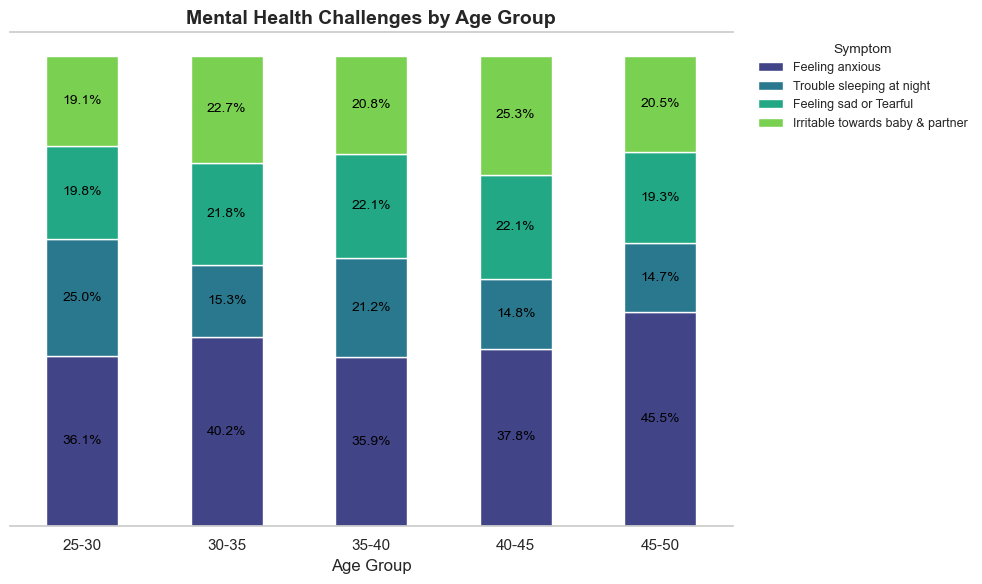

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Mental Health DataFrame ---
mh_summary = pd.DataFrame({
    'AgeGroup': ['25-30', '30-35', '35-40', '40-45', '45-50'],
    'Feeling anxious': [57.5, 66.0, 66.2, 62.4, 72.0],
    'Trouble sleeping at night': [39.8, 25.1, 39.0, 24.5, 23.2],
    'Feeling sad or Tearful': [31.5, 35.8, 40.7, 36.5, 30.6],
    'Irritable towards baby & partner': [30.4, 37.3, 38.4, 41.8, 32.5]
})
mh_summary.set_index('AgeGroup', inplace=True)

# --- Convert to 100% stacked format ---
mh_percent = mh_summary.div(mh_summary.sum(axis=1), axis=0) * 100

# --- Use Viridis color palette ---
colors = sns.color_palette("viridis", n_colors=len(mh_percent.columns))

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 6))
mh_percent.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Add data labels
for i, (idx, row) in enumerate(mh_percent.iterrows()):
    cumulative = 0
    for j, col in enumerate(mh_percent.columns):
        value = row[col]
        if value > 3:
            ax.text(i, cumulative + value / 2, f'{value:.1f}%', 
                    ha='center', va='center', fontsize=10, color='black')
        cumulative += value

# Final formatting
ax.set_title("Mental Health Challenges by Age Group", fontsize=14, fontweight='bold')
ax.set_ylabel('')
ax.set_yticks([])
ax.set_xlabel('Age Group')
ax.set_xticklabels(mh_percent.index, rotation=0)

# Remove all spines except bottom
for spine in ['left', 'right']:
    ax.spines[spine].set_visible(False)

# Remove legend frame/spine
legend = ax.legend(title='Symptom', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9, title_fontsize=10)
if legend:
    legend.get_frame().set_linewidth(0)
    legend.get_frame().set_edgecolor("none")

# remove the gridlines
ax.grid(False)

plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7696\3279609731.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_dist = maternal_data.groupby(['AgeGroup', 'RiskLevel']).size().unstack().fillna(0)


Mental Health Issue Rates by AgeGroup:
                                             AgeGroup  Feeling anxious  \
0  25-3025-3025-3025-3025-3025-3025-3025-3025-302...             57.5   
1  30-3530-3530-3530-3530-3530-3530-3530-3530-353...             66.0   
2  35-4035-4035-4035-4035-4035-4035-4035-4035-403...             66.2   
3  40-4540-4540-4540-4540-4540-4540-4540-4540-454...             62.4   
4  45-5045-5045-5045-5045-5045-5045-5045-5045-504...             72.0   

   Trouble sleeping at night  Feeling sad or Tearful  \
0                       39.8                    31.5   
1                       25.1                    35.8   
2                       39.0                    40.7   
3                       24.5                    36.5   
4                       23.2                    30.6   

   Irritable towards baby & partner  
0                              30.4  
1                              37.3  
2                              38.4  
3                              4

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7696\3279609731.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_summary = maternal_data.groupby('AgeGroup')['RiskLevel'].value_counts(normalize=True).unstack().fillna(0) * 100


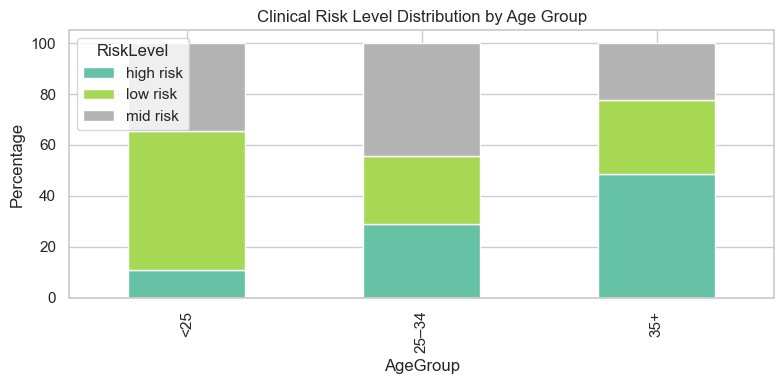

In [248]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Load both datasets
maternal_data = pd.read_csv("Data/Maternal Health Risk Data Set.csv")
post_natal = pd.read_csv("Data/post natal data.csv")

# Step 1: Create Age Groups
maternal_data['AgeGroup'] = pd.cut(
    maternal_data['Age'],
    bins=[0, 24, 34, 100],
    labels=['<25', '25–34', '35+']
)

post_natal['AgeGroup'] = post_natal['Age']

# Step 2: Prepare Postnatal Depression Variables (binary)
mh_vars = ['Feeling anxious', 'Trouble sleeping at night', 
           'Feeling sad or Tearful', 'Irritable towards baby & partner']

for var in mh_vars:
    # Convert to string, handle missing values, then check for 'yes'
    post_natal[var] = (
        post_natal[var]
        .astype(str)  # Convert all values to strings
        .str.lower()  # Make lowercase
        .str.contains('yes')  # Check for 'yes'
        .astype(int)  # Convert boolean to 1/0
    )

# Step 3: Aggregate % reporting each mental health issue by AgeGroup
mh_summary = post_natal.groupby('AgeGroup')[mh_vars].mean().reset_index() * 100

# Step 4: Aggregate maternal clinical risk counts by AgeGroup
risk_dist = maternal_data.groupby(['AgeGroup', 'RiskLevel']).size().unstack().fillna(0)

# Step 5: Cross-tabulation-like view (simulated association)
print("Mental Health Issue Rates by AgeGroup:\n", mh_summary.round(1))
print("\nClinical Risk Distribution by AgeGroup:\n", risk_dist.astype(int))

# Step 6: Chi-square tests — simulated using AgeGroup categories
for var in mh_vars:
    print(f"\nChi-square test for: RiskLevel vs {var}")
    
    # Bin the post_natal data by AgeGroup, count 'Yes' responses
    post_bins = post_natal.groupby('AgeGroup')[var].sum()
    
    # Get total responses in each group to compute observed freq
    total = post_natal['AgeGroup'].value_counts()
    
    # Observed = [yes, no] in each age group
    observed = pd.DataFrame({
        'Yes': post_bins,
        'No': total - post_bins
    })

    # Perform test
    chi2, p, dof, expected = chi2_contingency(observed)
    print(f"Chi2 = {chi2:.2f}, p = {p:.4f}")

# Step 7: Visualization — Stacked Bar Chart (Clinical Risk vs Mental Symptoms)

# Create a pseudo-link between the 2 datasets by AgeGroup → average across categories
risk_summary = maternal_data.groupby('AgeGroup')['RiskLevel'].value_counts(normalize=True).unstack().fillna(0) * 100
mh_summary.set_index('AgeGroup', inplace=True)

# Plot RiskLevel distribution by AgeGroup
risk_summary.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='Set2')
plt.title('Clinical Risk Level Distribution by Age Group')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()


### **🧪 RQ3: Does maternal age moderate the relationship between physiological health and risk level?**
**📌 Why?**
Age can amplify physiological vulnerability — older mothers may react differently to elevated BP or sugar levels than younger ones, influencing postpartum psychological outcomes.

**🔍 Analysis:**
Interaction plots: Age × BS, BP, HR → RiskLevel.

Stratified regression or classification by age group.

Correlation heatmaps within age brackets (<25, 25–34, 35+).

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7696\505379436.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  y = sns.pointplot(data=maternal_data,
c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  # Determine the support grid and get the density over it
c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  # Determine the support grid and get the density over it


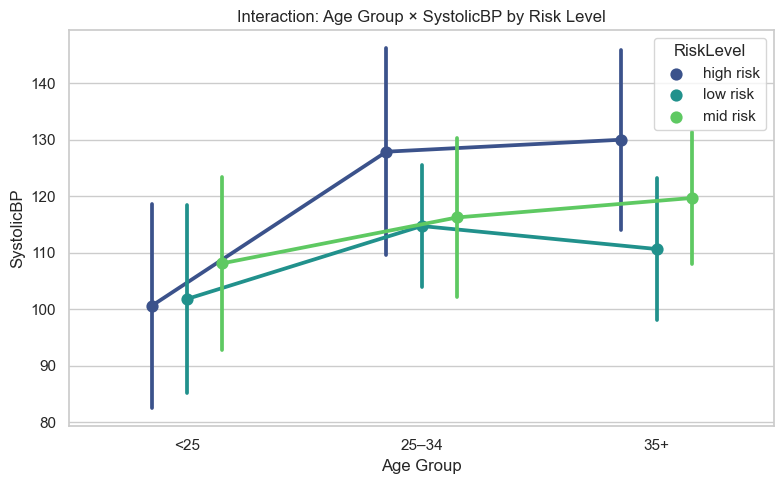

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7696\505379436.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  y = sns.pointplot(data=maternal_data,
c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  # Determine the support grid and get the density over it
c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  # Determine the support grid and get the density over it


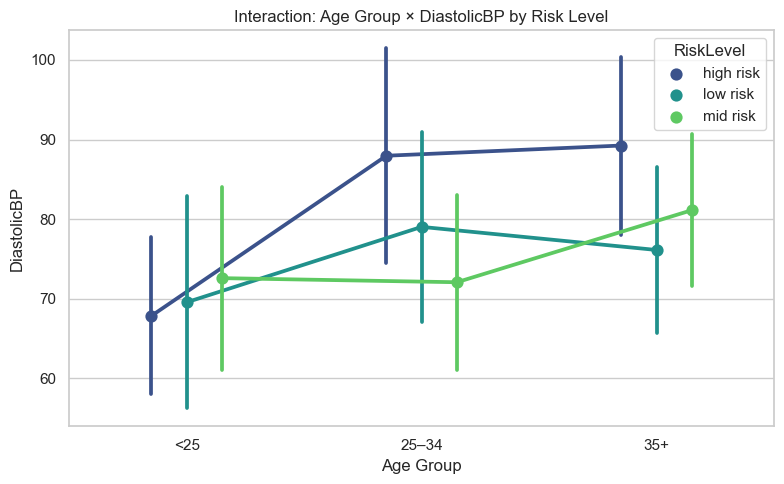

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7696\505379436.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  y = sns.pointplot(data=maternal_data,
c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  # Determine the support grid and get the density over it
c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  # Determine the support grid and get the density over it


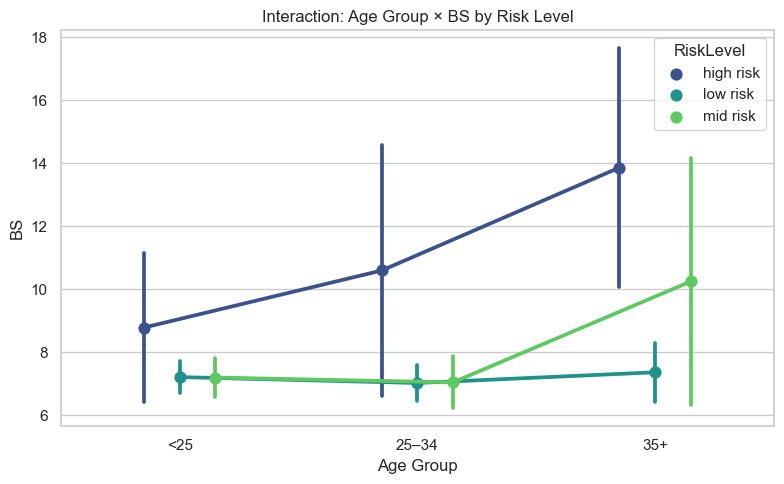

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7696\505379436.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  y = sns.pointplot(data=maternal_data,
c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  # Determine the support grid and get the density over it
c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  # Determine the support grid and get the density over it


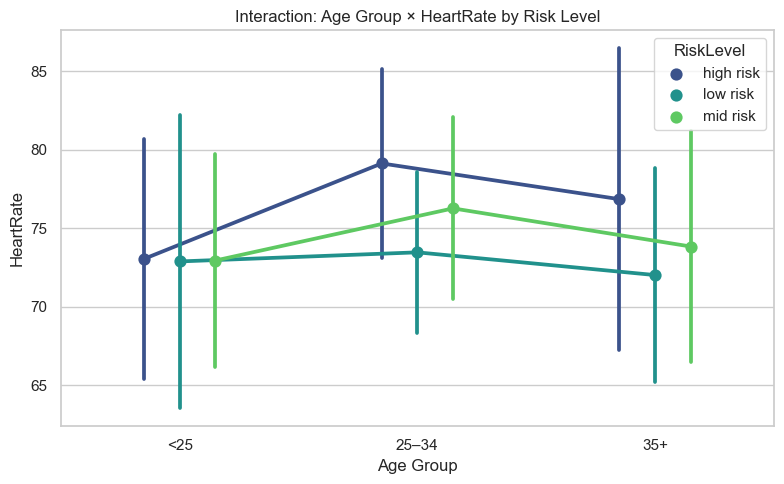

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7696\505379436.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  y = sns.pointplot(data=maternal_data,
c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  # Determine the support grid and get the density over it
c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  # Determine the support grid and get the density over it


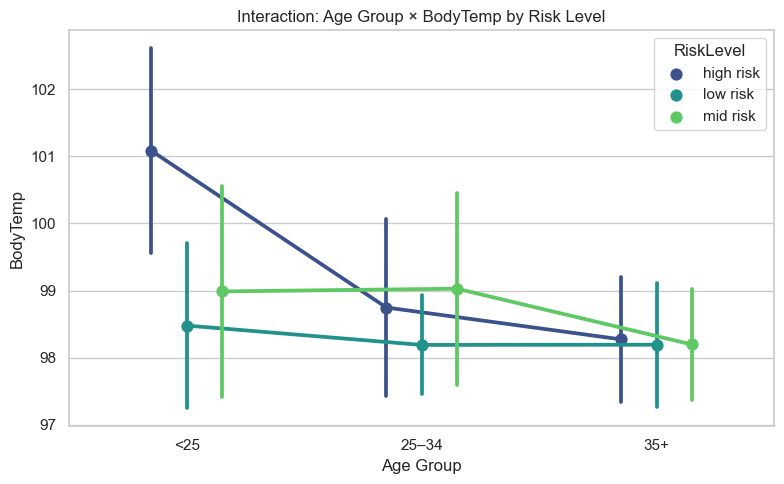

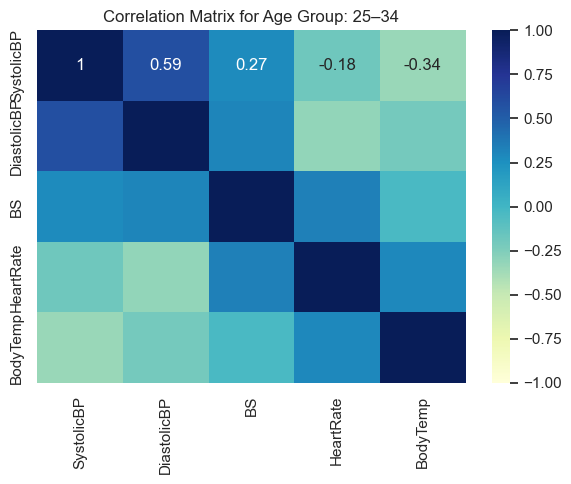

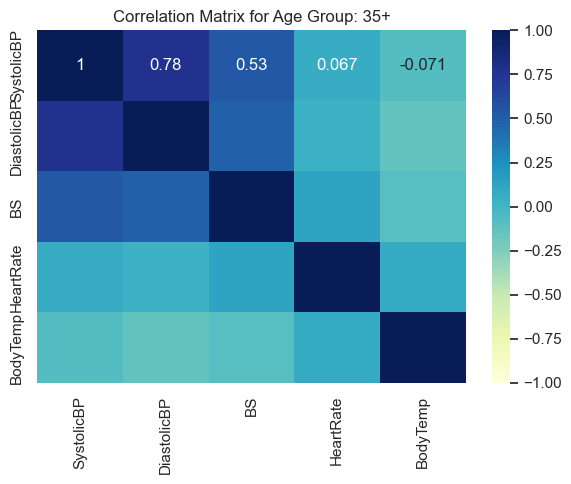

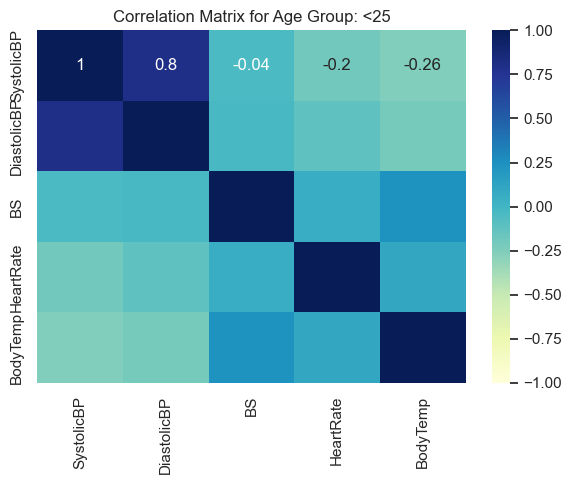

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
maternal_data = pd.read_csv("Data/Maternal Health Risk Data Set.csv")

# Step 1: Create Age Groups
maternal_data['AgeGroup'] = pd.cut(
    maternal_data['Age'],
    bins=[0, 24, 34, 100],
    labels=['<25', '25–34', '35+']
)

# Step 2: Interaction plots (Age vs physiological indicators by RiskLevel)
phys_vars = ['SystolicBP', 'DiastolicBP', 'BS', 'HeartRate', 'BodyTemp']

sns.set(style="whitegrid")
for var in phys_vars:
    plt.figure(figsize=(8, 5))
    sns.pointplot(data=maternal_data,
                  x='AgeGroup',
                  y=var,
                  hue='RiskLevel',
                  palette='viridis',
                  dodge=0.3,
                  ci='sd')
    plt.title(f'Interaction: Age Group × {var} by Risk Level')
    plt.ylabel(var)
    plt.xlabel('Age Group')
    plt.tight_layout()
    plt.show()

# Step 3: Correlation Heatmaps Within Each Age Group
for group in maternal_data['AgeGroup'].unique():
    group_data = maternal_data[maternal_data['AgeGroup'] == group]
    corr = group_data[phys_vars].corr()

    plt.figure(figsize=(6, 5))
    sns.heatmap(corr, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix for Age Group: {group}')
    plt.tight_layout()
    plt.show()


### **Maternal Mental Health and Infant Sleep**

This data explains the relationship between maternal mental health and infant sleep patterns during the first postpartum year. The dataset comprises responses from **410 mothers** (with infants aged **3–12 months**), capturing variables such as:  

- **Maternal mental health** (depression, anxiety, childbirth-related PTSD)  
- **Infant sleep factors** (sex, temperament perception, bedtime methods)  
- **Demographics** (parental age, education, marital status, pregnancy type)  

Key objectives:  
1. Examine how maternal mental health influences infant sleep.  
2. Identify **moderators** (e.g., maternal education, infant age) and **mediators** (e.g., perceived temperament).  
3. Inform interventions to support families' wellbeing.  

*Data source: [Kaggle](https://www.kaggle.com/datasets/thedevastator/maternal-mental-health-and-infant-sleep)*  

In [19]:
# load the maternal health and infant sleep data
maternal_mental_data = pd.read_csv(r"Data\Dataset maternal mental health infant sleep.csv", encoding='cp1252')
maternal_mental_data.head()

,Participant_number,Type_parents,Birth_1mth_M_inclusion,Birth_12mth_M_inclusion,Age,Marital_status,Marital_status_Autre,Marital_status_edit,Education,Gestationnal_age,...,IBQ_R_VSF_10_bb1,IBQ_R_VSF_16_bb1,IBQ_R_VSF_17_bb1,IBQ_R_VSF_28_bb1,IBQ_R_VSF_29_bb1,IBQ_R_VSF_32_bb1,IBQ_R_VSF_33_bb1,Sleep_night_duration_bb1,night_awakening_number_bb1,how_falling_asleep_bb1
0,1,1,1,1,34,2,NaN,2,5,37.0,...,NaN,7.0,NaN,NaN,7.0,6.0,NaN,10:00,3,2
1,2,1,1,1,33,2,NaN,2,5,42.0,...,2.0,3.0,2.0,2.0,2.0,3.0,4.0,11:00,0,4
2,3,1,1,1,37,2,NaN,2,5,41.0,...,4.0,4.0,3.0,1.0,4.0,NaN,NaN,12:00,1,2
3,4,1,1,1,31,2,NaN,2,5,37.5,...,1.0,3.0,NaN,NaN,NaN,5.0,NaN,11:00,2,1
4,5,1,1,1,36,1,NaN,1,5,40.0,...,4.0,2.0,2.0,4.0,5.0,6.0,6.0,10:30,1,4


In [20]:
#check all the data types of the columns
maternal_mental_data.dtypes

Participant_number              int64
Type_parents                    int64
Birth_1mth_M_inclusion          int64
Birth_12mth_M_inclusion         int64
Age                             int64
                               ...   
IBQ_R_VSF_32_bb1              float64
IBQ_R_VSF_33_bb1              float64
Sleep_night_duration_bb1       object
night_awakening_number_bb1      int64
how_falling_asleep_bb1          int64
Length: 64, dtype: object

In [23]:
#check for missing values
maternal_mental_data.isnull().sum()

Participant_number            0
Type_parents                  0
Birth_1mth_M_inclusion        0
Birth_12mth_M_inclusion       0
Age                           0
                             ..
IBQ_R_VSF_32_bb1              0
IBQ_R_VSF_33_bb1              0
Sleep_night_duration_bb1      0
night_awakening_number_bb1    0
how_falling_asleep_bb1        0
Length: 64, dtype: int64

In [22]:
# fill missing values with the mode of the column
maternal_mental_data["IBQ_R_VSF_32_bb1"].fillna(maternal_mental_data["IBQ_R_VSF_32_bb1"].mode()[0], inplace=True)
maternal_mental_data["IBQ_R_VSF_33_bb1"].fillna(maternal_mental_data["IBQ_R_VSF_33_bb1"].mode()[0], inplace=True)

### **RQ1: How does the maternal mental health trajectory evolve in the first year postpartum?**
Why: Understanding time-series change in CBTS helps reveal when interventions are most critical.

In [261]:
monthly_means

CBTS_M_3     0.526829
CBTS_M_4     0.207317
CBTS_M_5     0.726829
CBTS_M_6     0.497561
CBTS_M_7     0.365854
CBTS_M_8     0.346341
CBTS_M_9     0.224390
CBTS_M_10    0.429268
CBTS_M_11    0.448780
CBTS_M_12    0.543902
CBTS_13      0.900000
dtype: float64

In [263]:
monthly_means.values

array([0.52682927, 0.20731707, 0.72682927, 0.49756098, 0.36585366,
       0.34634146, 0.22439024, 0.42926829, 0.44878049, 0.54390244,
       0.9       ])

c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


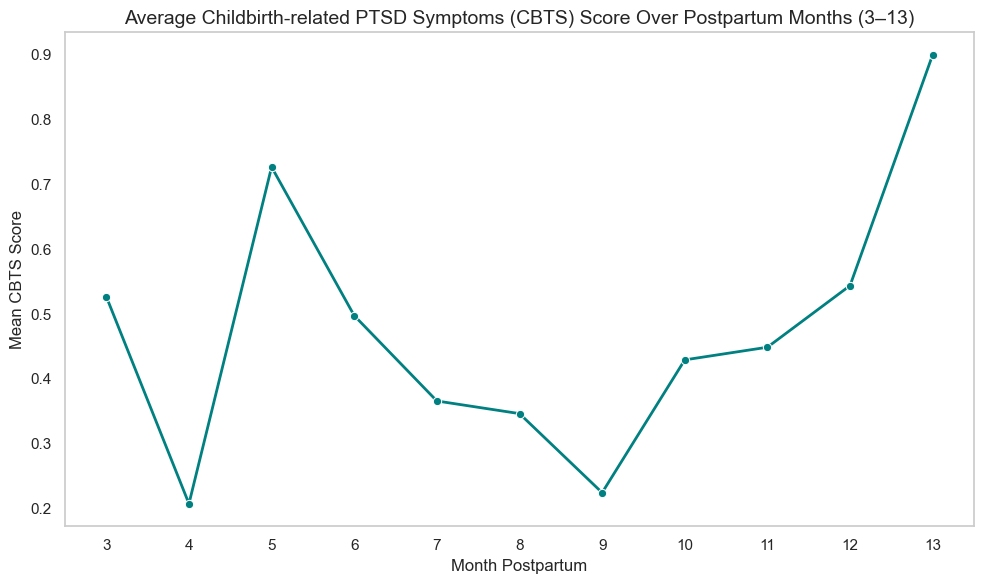

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- CBTS Columns ---
cbts_cols = ['CBTS_M_3', 'CBTS_M_4', 'CBTS_M_5', 'CBTS_M_6', 'CBTS_M_7',
             'CBTS_M_8', 'CBTS_M_9', 'CBTS_M_10', 'CBTS_M_11', 'CBTS_M_12', 'CBTS_13']

# Drop rows with missing CBTS values
cbts_data = maternal_mental_data[cbts_cols].dropna()

# Compute monthly means
monthly_means = cbts_data.mean()

# Plot
plt.figure(figsize=(10, 6))
ax = sns.lineplot(
    x=range(3, 14),
    y=monthly_means.values,
    marker='o',
    linewidth=2,
    color='teal'
)

# Customize appearance
plt.title('Average Childbirth-related PTSD Symptoms (CBTS) Score Over Postpartum Months (3–13)', fontsize=14)
plt.xlabel('Month Postpartum')
plt.ylabel('Mean CBTS Score')
plt.xticks(ticks=range(3, 14))

# Remove grid and selected spines
ax.grid(False)

plt.tight_layout()
plt.show()


In [262]:
from scipy.stats import shapiro

# Run Shapiro-Wilk test for each month
print("🔬 Shapiro-Wilk Normality Test for CBTS Scores (p < 0.05 = NOT Normal):\n")
for col in cbts_cols:
    data = maternal_mental_data[col].dropna()  # remove missing values
    stat, p = shapiro(data)
    print(f"{col}: p-value = {p:.4f} → {'NOT Normal' if p < 0.05 else 'Normal'}")

🔬 Shapiro-Wilk Normality Test for CBTS Scores (p < 0.05 = NOT Normal):

CBTS_M_3: p-value = 0.0000 → NOT Normal
CBTS_M_4: p-value = 0.0000 → NOT Normal
CBTS_M_5: p-value = 0.0000 → NOT Normal
CBTS_M_6: p-value = 0.0000 → NOT Normal
CBTS_M_7: p-value = 0.0000 → NOT Normal
CBTS_M_8: p-value = 0.0000 → NOT Normal
CBTS_M_9: p-value = 0.0000 → NOT Normal
CBTS_M_10: p-value = 0.0000 → NOT Normal
CBTS_M_11: p-value = 0.0000 → NOT Normal
CBTS_M_12: p-value = 0.0000 → NOT Normal
CBTS_13: p-value = 0.0000 → NOT Normal


In [29]:
from scipy.stats import friedmanchisquare

# -----------------------------
# 2. 🧪 Friedman Test (non-parametric repeated measures ANOVA)
# -----------------------------
# Transpose the data so we run Friedman test across months per participant
friedman_result = friedmanchisquare(*[cbts_data[col] for col in cbts_cols])

print("Friedman Test Result:")
print(f"Statistic: {friedman_result.statistic:.2f}, p-value: {friedman_result.pvalue:.4f}")

if friedman_result.pvalue < 0.05:
    print("✅ Significant differences in CBTS scores across months (p < 0.05)")
else:
    print("❌ No significant differences in CBTS scores across months (p ≥ 0.05)")

Friedman Test Result:
Statistic: 385.81, p-value: 0.0000
✅ Significant differences in CBTS scores across months (p < 0.05)


### **✅ RQ2: Which sociodemographic factors significantly predict elevated maternal stress (CBTS)?**
Why: Allows identification of vulnerable population subgroups for targeted mental health outreach.

In [34]:
# Create mean CBTS score across all months
cbts_cols = ['CBTS_M_3', 'CBTS_M_4', 'CBTS_M_5', 'CBTS_M_6', 'CBTS_M_7',
             'CBTS_M_8', 'CBTS_M_9', 'CBTS_M_10', 'CBTS_M_11', 'CBTS_M_12', 'CBTS_13']

maternal_mental_data["CBTS_mean"] = maternal_mental_data[cbts_cols].mean(axis=1)

# Create binary flag for elevated CBTS (e.g., threshold = 30)
maternal_mental_data["CBTS_elevated"] = (maternal_mental_data["CBTS_mean"] >= 30).astype(int)

In [35]:
# One-hot encode selected categorical predictors
predictors = ['Age', 'Marital_status_edit', 'Education', 'Type_parents', 'Type_pregnancy']
data_encoded = pd.get_dummies(maternal_mental_data[predictors + ['CBTS_mean', 'CBTS_elevated']], drop_first=True)

In [36]:
import statsmodels.api as sm

# Define target and predictors
X_lin = data_encoded.drop(columns=["CBTS_mean", "CBTS_elevated"])
y_lin = data_encoded["CBTS_mean"]

# Add constant for intercept
X_lin = sm.add_constant(X_lin)

# Fit the model
model_lin = sm.OLS(y_lin, X_lin).fit()

# Print summary
print(model_lin.summary())

                            OLS Regression Results                            
Dep. Variable:              CBTS_mean   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.929
Date:                Tue, 17 Jun 2025   Prob (F-statistic):              0.105
Time:                        20:51:58   Log-Likelihood:                -336.90
No. Observations:                 410   AIC:                             683.8
Df Residuals:                     405   BIC:                             703.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Age                    -0.0014    

In [40]:
import statsmodels.api as sm

# Define target and predictors
X_log = data_encoded.drop(columns=["CBTS_mean", "CBTS_elevated"])
y_log = data_encoded["CBTS_elevated"]

model_firth = sm.Logit(y_log, X_log, method='lbfgs', maxiter=1000).fit_regularized(alpha=0.1)
print(model_firth.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.00011541328458539095
            Iterations: 17
            Function evaluations: 23
            Gradient evaluations: 17
                           Logit Regression Results                           
Dep. Variable:          CBTS_elevated   No. Observations:                  410
Model:                          Logit   Df Residuals:                      409
Method:                           MLE   Df Model:                            0
Date:                Tue, 17 Jun 2025   Pseudo R-squ.:                     inf
Time:                        21:00:31   Log-Likelihood:             -0.0042343
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                       nan
                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------

c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['method', 'maxiter']
  warnings.warn(msg, ValueWarning)
c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['method', 'maxiter']
  warnings.warn(msg, ValueWarning)
c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  wa

In [71]:
import pandas as pd

# Create CBTS_mean if not yet computed
cbts_cols = [col for col in maternal_mental_data.columns if col.startswith('CBTS_M_')]
maternal_mental_data['CBTS_mean'] = maternal_mental_data[cbts_cols].mean(axis=1)

# Create Age_group column
bins = [0, 24, 29, 34, 39, 100]
labels = ['<25', '25-29', '30-34', '35-39', '40+']
maternal_mental_data['Age_group'] = pd.cut(maternal_mental_data['Age'], bins=bins, labels=labels)


c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


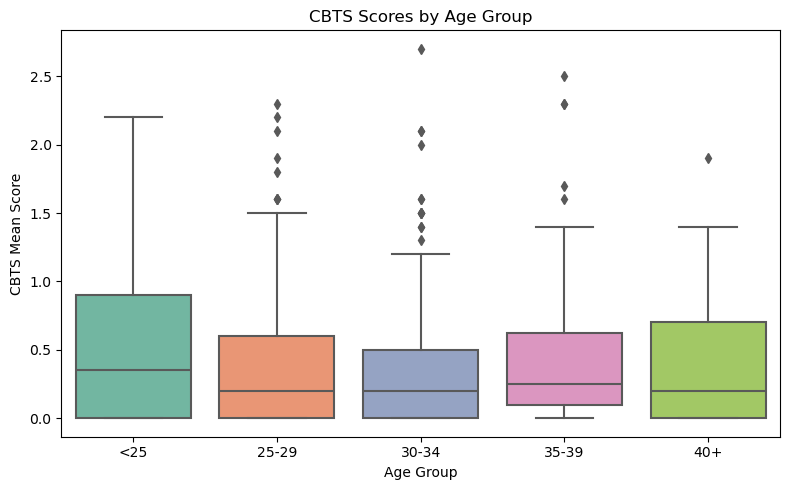

c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


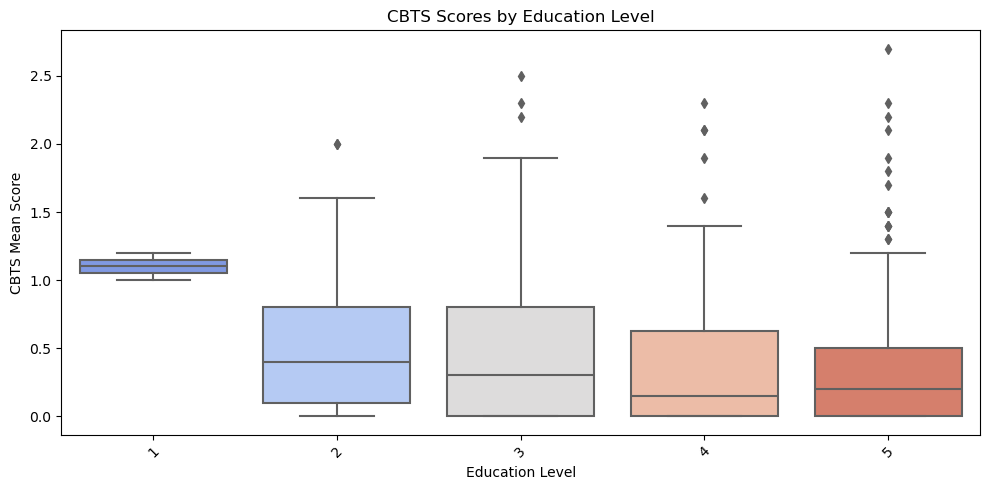

c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


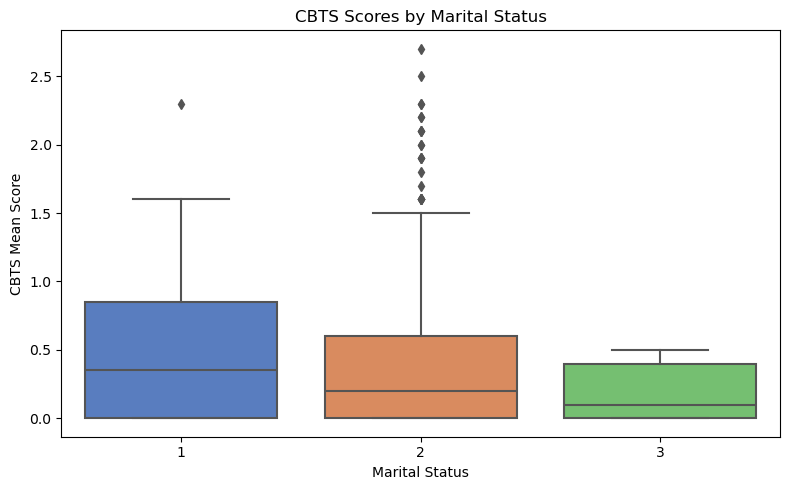

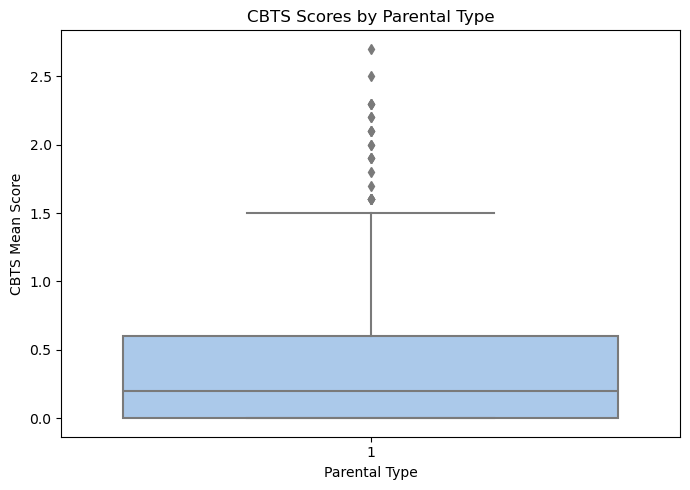

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: CBTS by Age Group
plt.figure(figsize=(8, 5))
sns.boxplot(data=maternal_mental_data, x='Age_group', y='CBTS_mean', palette='Set2')
plt.title("CBTS Scores by Age Group")
plt.ylabel("CBTS Mean Score")
plt.xlabel("Age Group")
plt.tight_layout()
plt.show()

# Boxplot: CBTS by Education Level
plt.figure(figsize=(10, 5))
sns.boxplot(data=maternal_mental_data, x='Education', y='CBTS_mean', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("CBTS Scores by Education Level")
plt.ylabel("CBTS Mean Score")
plt.xlabel("Education Level")
plt.tight_layout()
plt.show()

# Boxplot: CBTS by Marital Status
plt.figure(figsize=(8, 5))
sns.boxplot(data=maternal_mental_data, x='Marital_status_edit', y='CBTS_mean', palette='muted')
plt.title("CBTS Scores by Marital Status")
plt.ylabel("CBTS Mean Score")
plt.xlabel("Marital Status")
plt.tight_layout()
plt.show()

# Boxplot: CBTS by Parental Type
plt.figure(figsize=(7, 5))
sns.boxplot(data=maternal_mental_data, x='Type_parents', y='CBTS_mean', palette='pastel')
plt.title("CBTS Scores by Parental Type")
plt.ylabel("CBTS Mean Score")
plt.xlabel("Parental Type")
plt.tight_layout()
plt.show()


### **✅ RQ5: Can maternal education mediate the impact of CBTS levels on infant outcomes (e.g., sleep)?**
Why: Higher education may facilitate better coping strategies, potentially reducing the effects of stress on infant care routines.

In [54]:
# Ensure CBTS_mean exists
cbts_cols = ['CBTS_M_3', 'CBTS_M_4', 'CBTS_M_5', 'CBTS_M_6', 'CBTS_M_7',
             'CBTS_M_8', 'CBTS_M_9', 'CBTS_M_10', 'CBTS_M_11', 'CBTS_M_12', 'CBTS_13']
maternal_mental_data['CBTS_mean'] = maternal_mental_data[cbts_cols].mean(axis=1)

# Clean infant sleep column (already done earlier)
maternal_mental_data['Sleep_night_duration_bb1'] = (
    maternal_mental_data['Sleep_night_duration_bb1']
    .astype(str)
    .str.extract(r"(\d+\.?\d*)")[0]
    .astype(float)
)

# Convert Education to categorical (or numeric if ordinal)
maternal_mental_data['Education'] = maternal_mental_data['Education'].astype('category')

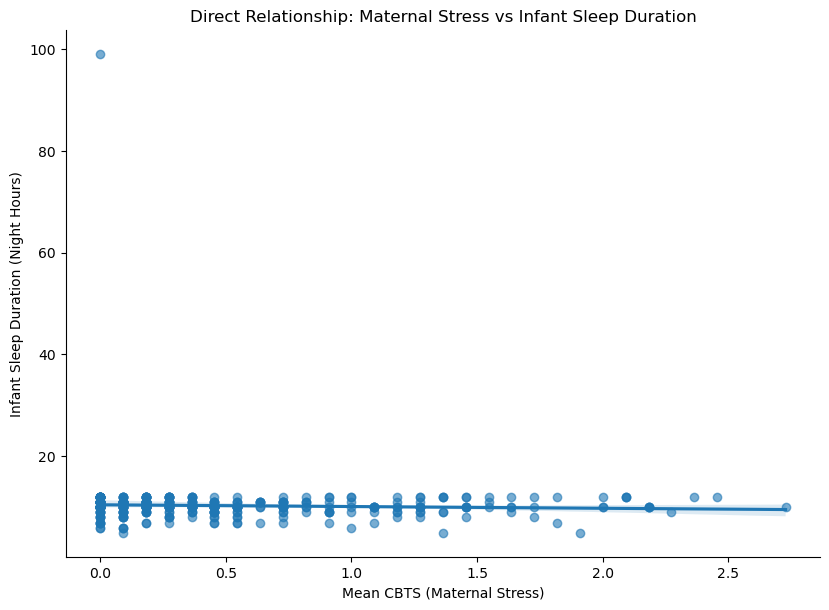

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(
    data=maternal_mental_data,
    x='CBTS_mean',
    y='Sleep_night_duration_bb1',
    aspect=1.4,
    height=6,
    scatter_kws={'alpha': 0.6}
)
plt.title("Direct Relationship: Maternal Stress vs Infant Sleep Duration")
plt.xlabel("Mean CBTS (Maternal Stress)")
plt.ylabel("Infant Sleep Duration (Night Hours)")
plt.show()


c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


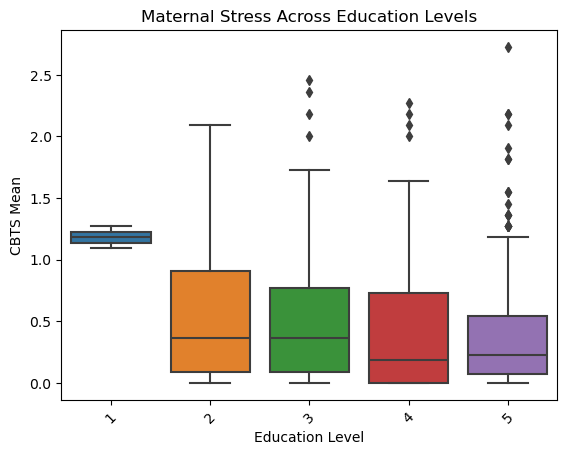

In [56]:
sns.boxplot(data=maternal_mental_data, x='Education', y='CBTS_mean')
plt.title("Maternal Stress Across Education Levels")
plt.xlabel("Education Level")
plt.ylabel("CBTS Mean")
plt.xticks(rotation=45)
plt.show()

c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


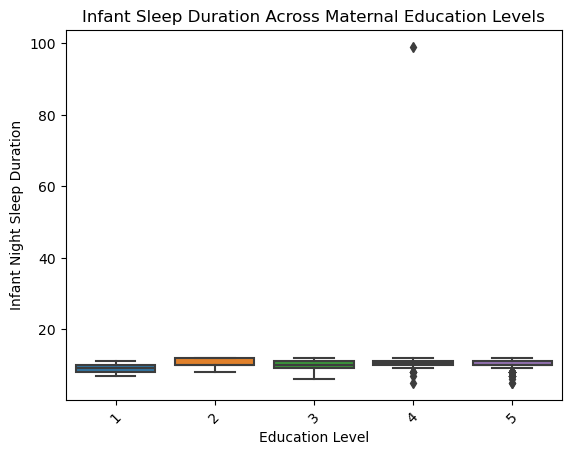

In [57]:
sns.boxplot(data=maternal_mental_data, x='Education', y='Sleep_night_duration_bb1')
plt.title("Infant Sleep Duration Across Maternal Education Levels")
plt.xlabel("Education Level")
plt.ylabel("Infant Night Sleep Duration")
plt.xticks(rotation=45)
plt.show()


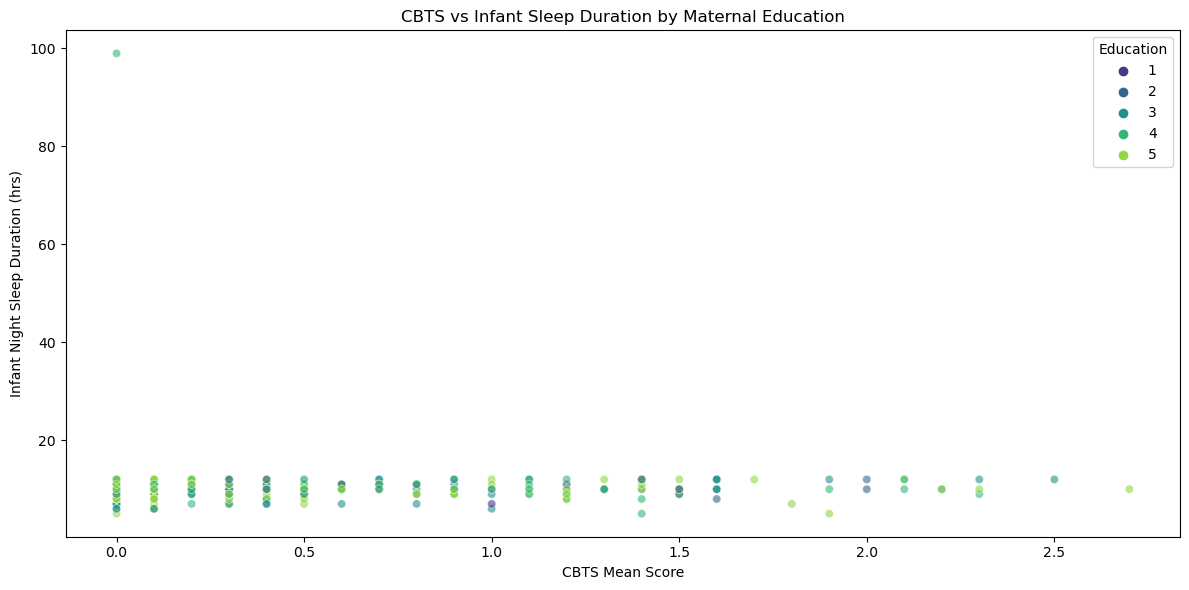

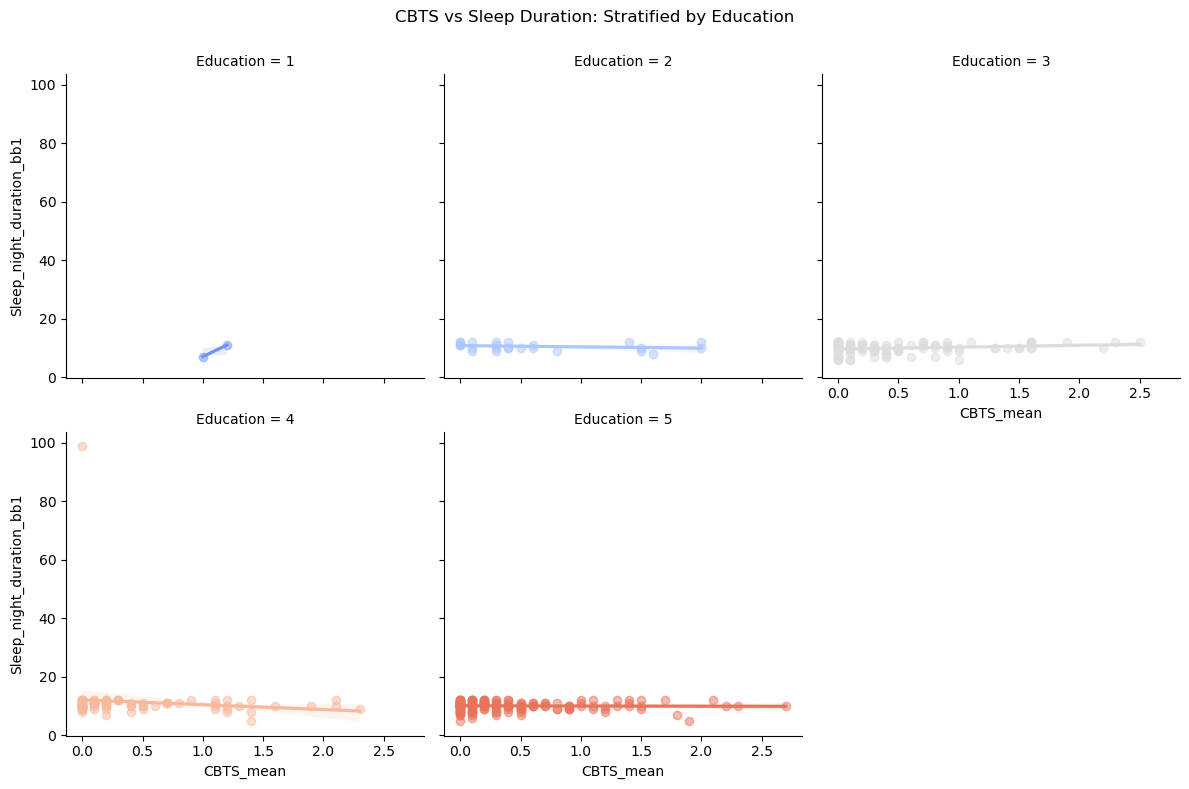

In [76]:
# Stripplot: CBTS vs Infant Sleep by Education Level
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=maternal_mental_data,
    x='CBTS_mean',
    y='Sleep_night_duration_bb1',
    hue='Education',
    alpha=0.6,
    palette='viridis'
)
plt.title("CBTS vs Infant Sleep Duration by Maternal Education")
plt.xlabel("CBTS Mean Score")
plt.ylabel("Infant Night Sleep Duration (hrs)")
plt.tight_layout()
plt.show()

# Optional: Plot regression lines stratified by Education
sns.lmplot(
    data=maternal_mental_data,
    x='CBTS_mean',
    y='Sleep_night_duration_bb1',
    hue='Education',
    col='Education',
    col_wrap=3,
    height=4,
    palette='coolwarm',
    scatter_kws={'alpha':0.5}
)
plt.subplots_adjust(top=0.9)
plt.suptitle("CBTS vs Sleep Duration: Stratified by Education")
plt.show()


# **Analysis of Postnatal Depression Predictors in Nairobi Slums**

## Study Background

The analysis below was captured from:  
**"Predictors of postnatal depression in the slums Nairobi, Kenya: a cross-sectional study"**  
*Kariuki, E.W., Kuria, M.W., Were, F.N. et al. BMC Psychiatry 22, 242 (2022).*

[View original publication](https://bmcpsychiatry.biomedcentral.com/articles/10.1186/s12888-022-03885-4)

### Key Study Information:

**Background:**  
Postnatal depression (PND) is a significant mental health challenge affecting mothers' wellbeing and childcare capabilities. While high PND prevalence rates have been documented in Africa, including Kenya, limited research exists on contributing factors within low-resource communities.

In [83]:
import pandas as pd
from tabulate import tabulate

# Create the table data
socio_demographic = [
    ["Age in Years", "18-24 Years", 256, 45.1],
    ["", "25-30 Years", 213, 37.6],
    ["", "31-40", 98, 17.3],
    ["Age years", "Mean (sd), Range", "25.9 (sd)", "18-40"],
    ["Education Level", "Primary", 207, 36.5],
    ["", "Secondary", 303, 53.4],
    ["", "Graduate and above", 57, 10.1],
    ["Marital Status", "Currently married", 509, 89.8],
    ["", "Currently not Married", 58, 10.2],
    ["Employment Status", "Employed", 85, 15],
    ["", "Self-employed", 102, 18],
    ["", "Unemployed", 380, 67],
    ["Monthly Income", "< 10,000", 198, 34.9],
    ["", "10,000-19,000", 186, 32.8],
    ["", "20,000-29,000", 103, 18.2],
    ["", "30,000 and Above", 80, 14.1],
    ["Suffering from Chronic Illness", "No", 538, 94.9],
    ["", "Yes", 29, 5.1],
    ["Satisfied with body image", "No", 74, 13.1],
    ["", "Yes", 493, 86.9],
    ["Conflict with any close relatives", "No", 501, 88.4],
    ["", "Yes", 66, 11.6],
    ["Have a Stressful life Event", "No", 406, 71.6],
    ["", "Yes", 161, 28.4],
    ["Pregnancy Planned", "No", 185, 32.6],
    ["", "Yes", 382, 67.4],
    ["Happy with baby's Health", "No", 191, 33.7],
    ["", "Yes", 376, 66.3],
    ["Have Work Problems (fatigue)", "No", 432, 76.2],
    ["", "Yes", 135, 23.8],
    ["Age of the infant", "6 Weeks", 400, 70.5],
    ["", "7-10 Weeks", 167, 29.5],
    ["Gestation at birth", "< 37 Weeks", 53, 9.3],
    ["", ">= 37 Weeks", 514, 90.7]
]

# Create DataFrame
headers = ["Variable", "Category", "Frequency/mean (N = 567)", "Percentage (%)"]
socio_demographic_table = pd.DataFrame(socio_demographic, columns=headers)

# Print the table using tabulate
socio_demographic_table

,Variable,Category,Frequency/mean (N = 567),Percentage (%)
0,Age in Years,18-24 Years,256,45.1
1,,25-30 Years,213,37.6
2,,31-40,98,17.3
3,Age years,"Mean (sd), Range",25.9 (sd),18-40
4,Education Level,Primary,207,36.5
5,,Secondary,303,53.4
6,,Graduate and above,57,10.1
7,Marital Status,Currently married,509,89.8
8,,Currently not Married,58,10.2
9,Employment Status,Employed,85,15


In [85]:
import pandas as pd
from tabulate import tabulate

# Create the table data
predictors_depression = [
    ["Age in Years", "18-24", "2.04(1.03)", "[0.02; 4.05]", "0.047"],
    ["", "25-30", "1.11(1.05)", "[-0.94; 3.17]", "0.289"],
    ["", "31-40", "Ref.", "", ""],
    ["Education Level", "Primary", "2.56(1.36)", "[-0.10; 5.22]", "0.060"],
    ["", "Secondary", "-0.09(1.28)", "[-2.60; 2.41]", "0.941"],
    ["", "Graduate and above", "Ref.", "", ""],
    ["Employment Status", "Employed", "-1.56(1.08)", "[-3.67; 0.55]", "0.148"],
    ["", "Self-employed", "-1.26(0.97)", "[-3.16; 0.64]", "0.193"],
    ["", "Unemployed", "Ref.", "", ""],
    ["Monthly Income", "< 10,000", "1.43(1.18)", "[-0.88; 3.74]", "0.225"],
    ["", "10,000-19,000", "0.60(1.19)", "[-1.73; 2.92]", "0.614"],
    ["", "20,000-29,000", "0.09(1.29)", "[-2.45; 2.63]", "0.944"],
    ["", "30,000 and above", "Ref.", "", ""],
    ["Satisfied with body image", "No", "4.33(1.06)", "[2.26; 6.41]", "< 0.001"],
    ["", "Yes", "Ref.", "", ""],
    ["Conflict with any close relatives", "No", "-1.95(1.12)", "[-4.15; 0.25]", "0.082"],
    ["", "Yes", "Ref.", "", ""],
    ["Have a Stressful life Event", "No", "-1.71(0.81)", "[-3.30; -0.11]", "0.036"],
    ["", "Yes", "Ref.", "", ""],
    ["Pregnancy Planned", "No", "2.31(0.76)", "[0.81; 3.80]", "0.003"],
    ["", "Yes", "Ref.", "", ""],
    ["Have Work Problems", "No", "-1.85(0.84)", "[-3.50; -0.20]", "0.028"],
    ["", "Yes", "Ref.", "", ""]
]

# Create DataFrame with simplified headers
headers = ["Variable", "Category", "β(s.e)", "95% C.I", "p-value"]
predictors_depression_table = pd.DataFrame(predictors_depression, columns=headers)

#Display the table
predictors_depression_table

,Variable,Category,β(s.e),95% C.I,p-value
0,Age in Years,18-24,2.04(1.03),[0.02; 4.05],0.047
1,,25-30,1.11(1.05),[-0.94; 3.17],0.289
2,,31-40,Ref.,,
3,Education Level,Primary,2.56(1.36),[-0.10; 5.22],0.060
4,,Secondary,-0.09(1.28),[-2.60; 2.41],0.941
5,,Graduate and above,Ref.,,
6,Employment Status,Employed,-1.56(1.08),[-3.67; 0.55],0.148
7,,Self-employed,-1.26(0.97),[-3.16; 0.64],0.193
8,,Unemployed,Ref.,,
9,Monthly Income,"< 10,000",1.43(1.18),[-0.88; 3.74],0.225


In [81]:
# Create the table data for adjusted odds ratios
Sensitivity_Analysis = [
    ["Age in Years", "18-24 Years", "1", ""],
    ["", "25-30 Years", "0.68(0.41-1.14)", "0.144"],
    ["", "31-40", "0.68(0.36-1.29)", "0.243"],
    ["Education Level", "Primary", "1", ""],
    ["", "Secondary", "0.49(0.31-0.78)", "0.002"],
    ["", "Graduate and above", "0.27(0.09-0.75)", "0.013"],
    ["Employment Status", "Employed", "1", ""],
    ["", "Self-employed", "0.82(0.32-2.08)", "0.676"],
    ["", "Unemployed", "1.55(0.73-3.26)", "0.252"],
    ["Monthly Income", "< 10,000", "1", ""],
    ["", "10,000-19,000", "0.89(0.53-1.50)", "0.672"],
    ["", "20,000-29,000", "0.54(0.26-1.12)", "0.097"],
    ["", "30,000 and Above", "0.95(0.44-2.05)", "0.900"],
    ["Satisfied with body image", "No", "1", ""],
    ["", "Yes", "0.37(0.21-0.67)", "0.001"],
    ["Conflict with any close relatives", "No", "1", ""],
    ["", "Yes", "2.33(1.28-4.26)", "0.006"],
    ["Have a Stressful life Event", "No", "1", ""],
    ["", "Yes", "1.22(0.75-1.97)", "0.423"],
    ["Pregnancy Planned", "No", "1", ""],
    ["", "Yes", "0.50(0.32-0.79)", "0.003"],
    ["Have Work Problems", "No", "1", ""],
    ["", "Yes", "2.11(1.29-3.47)", "0.003"]
]

# Create DataFrame
headers = ["Variable", "Category", "A.O.R.(95% C.I)", "P-value"]
Sensitivity_Analysis_table = pd.DataFrame(Sensitivity_Analysis, columns=headers)

# Print the table 
Sensitivity_Analysis_table

,Variable,Category,A.O.R.(95% C.I),P-value
0,Age in Years,18-24 Years,1,
1,,25-30 Years,0.68(0.41-1.14),0.144
2,,31-40,0.68(0.36-1.29),0.243
3,Education Level,Primary,1,
4,,Secondary,0.49(0.31-0.78),0.002


### **RQ1. Socio‑demographic characteristics of mothers with postpartum depression**

In [91]:
import pandas as pd

# Manually enter Table 1 values
data = {
    "Variable": [
        "Age in Years", "Age in Years", "Age in Years",
        "Education Level", "Education Level", "Education Level", "Education Level",
        "Marital Status", "Marital Status",
        "Employment Status", "Employment Status", "Employment Status",
        "Monthly Income", "Monthly Income", "Monthly Income", "Monthly Income",
        "Body Image Satisfaction", "Body Image Satisfaction",
        "Family Conflict", "Family Conflict",
        "Pregnancy Planned", "Pregnancy Planned",
        "Gestation", "Gestation",
    ],
    "Category": [
        "<20", "20–29", "≥30",
        "None", "Primary", "Secondary", "Graduate",
        "Single", "Married",
        "Unemployed", "Informal", "Formal",
        "<10,000", "10–19,999", "20–29,999", "≥30,000",
        "Yes", "No",
        "No", "Yes",
        "Yes", "No",
        "Term", "Preterm"
    ],
    "Percentage": [
        12.5, 68.3, 19.2,
        2.0, 36.2, 52.8, 9.0,
        16.2, 83.8,
        66.8, 24.0, 9.2,
        34.5, 39.0, 20.2, 6.3,
        87.2, 12.8,
        88.3, 11.7,
        67.3, 32.7,
        84.5, 15.5
    ]
}

socio_df = pd.DataFrame(data)
socio_df


,Variable,Category,Percentage
0,Age in Years,<20,12.5
1,Age in Years,20–29,68.3
2,Age in Years,≥30,19.2
3,Education Level,None,2.0
4,Education Level,Primary,36.2
5,Education Level,Secondary,52.8
6,Education Level,Graduate,9.0
7,Marital Status,Single,16.2
8,Marital Status,Married,83.8
9,Employment Status,Unemployed,66.8


### **RQ1. Socio‑demographic characteristics of mothers with postpartum depression**
(Univariate analysis)

Aim: Identify vulnerable groups by examining distribution of demographic and health variables.

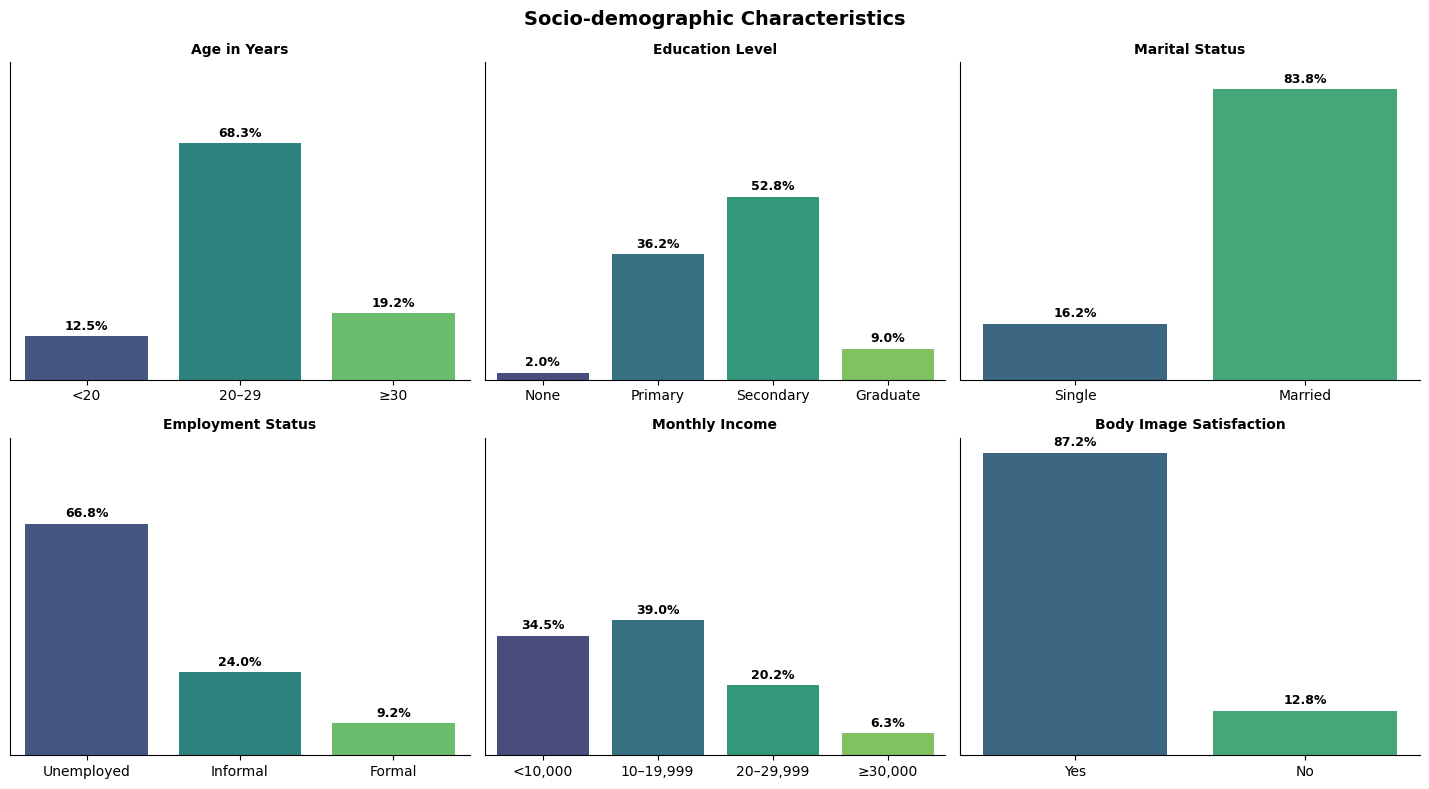

In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Manually enter Table 1 values
data = {
    "Variable": [
        "Age in Years", "Age in Years", "Age in Years",
        "Education Level", "Education Level", "Education Level", "Education Level",
        "Marital Status", "Marital Status",
        "Employment Status", "Employment Status", "Employment Status",
        "Monthly Income", "Monthly Income", "Monthly Income", "Monthly Income",
        "Body Image Satisfaction", "Body Image Satisfaction",
        "Family Conflict", "Family Conflict",
        "Pregnancy Planned", "Pregnancy Planned",
        "Gestation", "Gestation",
        "Age of the infant", "Age of the infant",
    ],
    "Category": [
        "<20", "20–29", "≥30",
        "None", "Primary", "Secondary", "Graduate",
        "Single", "Married",
        "Unemployed", "Informal", "Formal",
        "<10,000", "10–19,999", "20–29,999", "≥30,000",
        "Yes", "No",
        "No", "Yes",
        "Yes", "No",
        "Term", "Preterm",
        "6 Weeks", "7-10 Weeks"
    ],
    "Percentage": [
        12.5, 68.3, 19.2,
        2.0, 36.2, 52.8, 9.0,
        16.2, 83.8,
        66.8, 24.0, 9.2,
        34.5, 39.0, 20.2, 6.3,
        87.2, 12.8,
        88.3, 11.7,
        67.3, 32.7,
        84.5, 15.5,
        70.5, 29.5
    ]
}

# Create DataFrame and filter selected variables
socio_df = pd.DataFrame(data)
selected_vars = [
    "Age in Years", "Education Level", "Marital Status",
    "Employment Status", "Monthly Income", "Body Image Satisfaction"
]
socio_df = socio_df[socio_df["Variable"].isin(selected_vars)]

# Create FacetGrid
g = sns.FacetGrid(socio_df, col="Variable", col_wrap=3, height=4, aspect=1.2, sharex=False)

# Map barplot with viridis palette and add data labels
def barplot_with_labels(data, **kwargs):
    ax = sns.barplot(data=data, x="Category", y="Percentage", palette="viridis")
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 1, f'{height:.1f}%', 
                ha="center", va="bottom", fontsize=9, fontweight='bold')
    ax.set_ylabel("")
    ax.set_yticks([])

g.map_dataframe(barplot_with_labels)

# Final layout adjustments
g.set_titles("{col_name}", fontsize=12, fontweight='bold')
g.set_axis_labels("", "", fontsize=10)
g.set_xticklabels(rotation=0)
g.fig.subplots_adjust(top=0.88)
g.fig.suptitle("Socio‑demographic Characteristics", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


### **RQ2. Psychosocial stressors and postpartum depression**
(Bivariate analysis)

Aim: Link body image dissatisfaction and family conflict with PPD indicators.

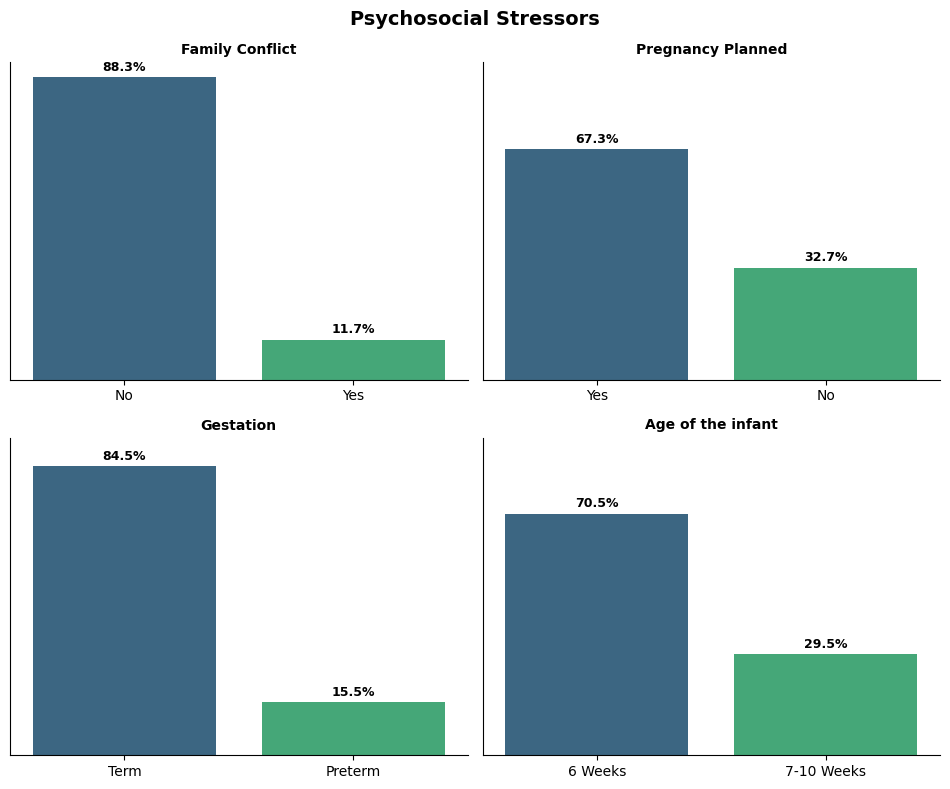

In [135]:
# Create DataFrame and filter selected variables
socio_df = pd.DataFrame(data)
selected_vars = [
    "Family Conflict", "Pregnancy Planned", "Gestation", "Age of the infant"
]
socio_df = socio_df[socio_df["Variable"].isin(selected_vars)]

# Create FacetGrid
g = sns.FacetGrid(socio_df, col="Variable", col_wrap=2, height=4, aspect=1.2, sharex=False)

# Map barplot with viridis palette and add data labels
def barplot_with_labels(data, **kwargs):
    ax = sns.barplot(data=data, x="Category", y="Percentage", palette="viridis")
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 1, f'{height:.1f}%', 
                ha="center", va="bottom", fontsize=9, fontweight='bold')
    ax.set_ylabel("")
    ax.set_yticks([])

g.map_dataframe(barplot_with_labels)

# Final layout adjustments
g.set_titles("{col_name}", fontsize=12, fontweight='bold')
g.set_axis_labels("", "", fontsize=10)
g.set_xticklabels(rotation=0)
g.fig.subplots_adjust(top=0.88)
g.fig.suptitle("Psychosocial Stressors", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

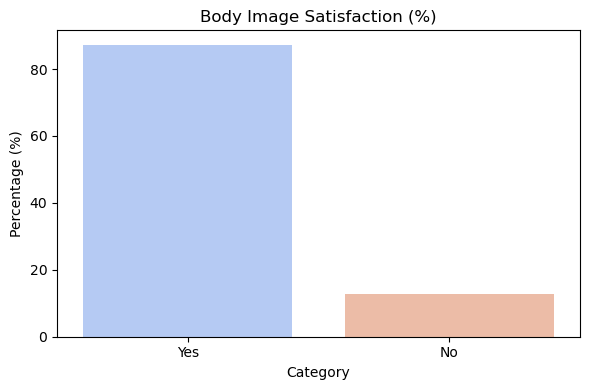

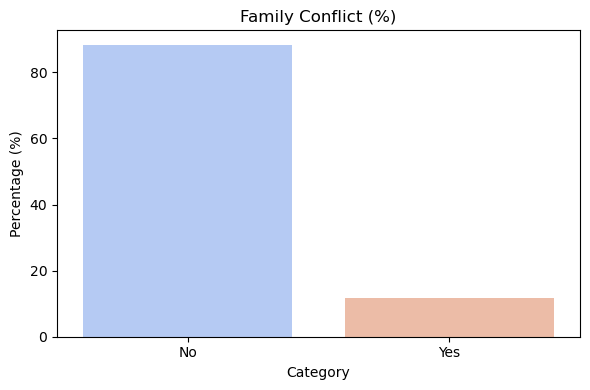

In [98]:
stressors = ["Body Image Satisfaction", "Family Conflict"]
for var in stressors:
    df = socio_df[socio_df["Variable"] == var]
    plt.figure(figsize=(6,4))
    sns.barplot(x="Category", y="Percentage", data=df, palette="coolwarm")
    plt.title(f"{var} (%)")
    plt.ylabel("Percentage (%)")
    plt.tight_layout()
    plt.show()

### **RQ3. Pregnancy intention and neonatal characteristics**
(Bivariate & Multivariate descriptive)

Aim: Examine planned/unplanned pregnancy and preterm birth in relation to PPD.

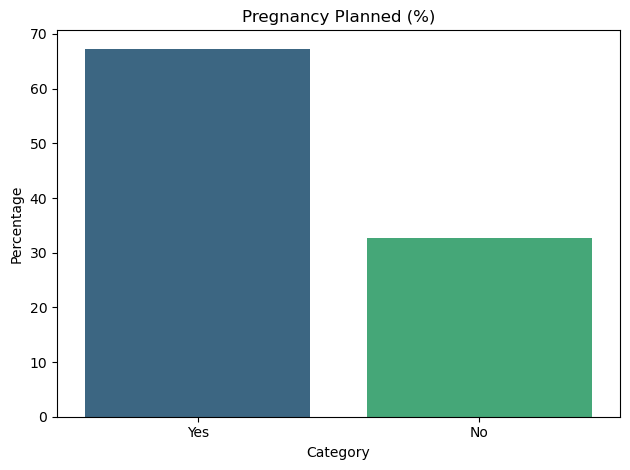

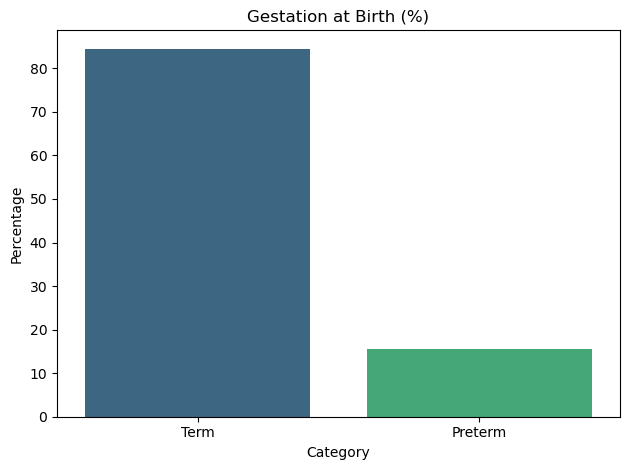

             Variable Category      β(s.e)       95% C.I p-value
19  Pregnancy Planned       No  2.31(0.76)  [0.81; 3.80]   0.003
              Variable Category       β(s.e)         95% C.I p-value
21  Have Work Problems       No  -1.85(0.84)  [-3.50; -0.20]   0.028


In [99]:
# Pregnancy intention
preg = socio_df[socio_df["Variable"] == "Pregnancy Planned"]
sns.barplot(x="Category", y="Percentage", data=preg, palette="viridis")
plt.title("Pregnancy Planned (%)")
plt.tight_layout()
plt.show()

# Gestation at birth
gest = socio_df[socio_df["Variable"] == "Gestation"]
sns.barplot(x="Category", y="Percentage", data=gest, palette="viridis")
plt.title("Gestation at Birth (%)")
plt.tight_layout()
plt.show()

# From Table 2 (β-coefficients)
print(predictors_depression_table[predictors_depression_table["Variable"]=="Pregnancy Planned"])
print(predictors_depression_table[predictors_depression_table["Variable"]=="Have Work Problems"])
